<a href="https://colab.research.google.com/github/shylitboi/DArt-B_Project/blob/main/%EB%B0%9C%EB%93%B1%ED%8A%80%EA%B9%80_%EC%BD%94%EB%93%9C_%ED%86%B5%ED%95%A9%EB%B3%B8_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) 현상
통계청에 따르면, 심장질환은 2023년 대한민국 사망원인통계 2위를 기록했다.

심혈관 질환 중 심장병(Heart Disease)은 특히 치명률이 높고, 질병을 조기에 예측하지 못할 경우 막대한 사회·경제적 비용을 초래한다.

하지만 심장병은 흡연, 음주, 비만, 신체활동 부족, 수면 부족, 정신적 스트레스 등 생활습관과 밀접하게 연관되어 있어, 적절한 예측 및 조기 개입을 통해 충분히 예방할 수 있다.

# 2) 목적 및 문제 정의

### 목적
- 심혈관 질환(HeartDisease) 여부를 예측하는 분류 모델을 개발한다.
- 목표는 단순한 높은 정확도(accuracy)가 아닌, **의미 있는 임상적 예측성**을 가지는 모델이다.
- **소수 클래스(positive case)**를 잘 예측하는 것에 집중한다.

---

### 문제 정의

- **클래스 불균형 심각**: HeartDisease, Stroke 등에서 소수 클래스 비율이 매우 낮음
- **클래스 불균형으로 인한 Accuracy 함정 존재**:
  - 예: 모두 'No'라고 예측해도 Accuracy는 99%지만 이는 모델이 쓸모 없음을 의미함.
- **따라서 정확도(Accuracy)가 아닌, 다음과 같은 지표를 중심으로 평가**:
  - **Recall (재현율)**: 실제 질환자 중 몇 명을 맞췄는가? (False Negative 방지)
  - **Precision (정밀도)**: 질환이라고 예측한 것 중 진짜 질환자의 비율
  - **F1 Score**: Precision과 Recall의 조화 평균
  - **ROC AUC**: 전체 이진 분류 능력을 보여주는 지표

# 3) 지표(데이터) 결정

Kaggle - [Indicators of Heart Disease](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data)

2020년 미국 질병통제예방센터(CDC)가 실시한 미국 성인 대상 연간 건강 설문조사.

| 변수명             | 설명                                                                                 | 값/범위                            | 타입      |
|------------------|--------------------------------------------------------------------------------------|-----------------------------------|----------|
| `HeartDisease`   | 심장병 여부 (관상동맥질환 또는 심근경색 병력 여부)                                       | `Yes` / `No`                      | 범주형    |
| `BMI`            | 체질량지수 (Body Mass Index)                                                           | 실수형 (예: 16.6, 24.3 등)         | 수치형    |
| `Smoking`        | 평생 100개비 이상의 담배를 피운 적 있는가?                                               | `Yes` / `No`                      | 범주형    |
| `AlcoholDrinking`| 고위험 음주 여부 (남성 주 14잔 초과, 여성 주 7잔 초과)                                     | `Yes` / `No`                      | 범주형    |
| `Stroke`         | 뇌졸중 진단 여부 (병원에서 받은 적 있는가?)                                               | `Yes` / `No`                      | 범주형    |
| `PhysicalHealth` | **최근 30일 중 신체적으로 건강하지 않았던 날 수**                                        | 0~30일                            | 수치형    |
| `MentalHealth`   | **최근 30일 중 정신적으로 건강하지 않았던 날 수**                                        | 0~30일                            | 수치형    |
| `DiffWalking`    | 계단 오르기 또는 걷기 어려움 존재 여부                                                    | `Yes` / `No`                      | 범주형    |
| `Sex`            | 성별                                                                                   | `Male` / `Female`                 | 범주형    |
| `AgeCategory`    | 나이 구간 (14단계 구간)                                                                  | `18-24`, `25-29`, ..., `80 or older` | 범주형    |
| `Race`           | 인종                                                                                   | `White`, `Black`, `Asian`, 등     | 범주형    |
| `Diabetic`       | 당뇨 진단 여부 (임신성 당뇨 포함 여부는 데이터에 따라 다름)                                 | `Yes` / `No` / `No, borderline`, etc. | 범주형 |
| `PhysicalActivity`| 최근 30일 이내 여가 시간 중 운동 또는 신체 활동을 한 적 있는가?                            | `Yes` / `No`                      | 범주형    |
| `GenHealth`      | 본인의 일반적인 건강 상태에 대한 자가 평가                                               | `Excellent`, `Very good`, ..., `Poor` | 범주형 |
| `SleepTime`      | 하루 평균 수면 시간(1~24)                                                                       | 0~24시간 (보통 4~12 사이)         | 수치형    |
| `Asthma`         | 천식 진단 여부                                                                           | `Yes` / `No`                      | 범주형    |
| `KidneyDisease`  | 신장 질환 진단 여부 (요로결석, 방광염 등 제외)                                           | `Yes` / `No`                      | 범주형    |
| `SkinCancer`     | 피부암 진단 여부  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/toy_HeartDiseases/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 4.1) EDA & 시각화

<Axes: >

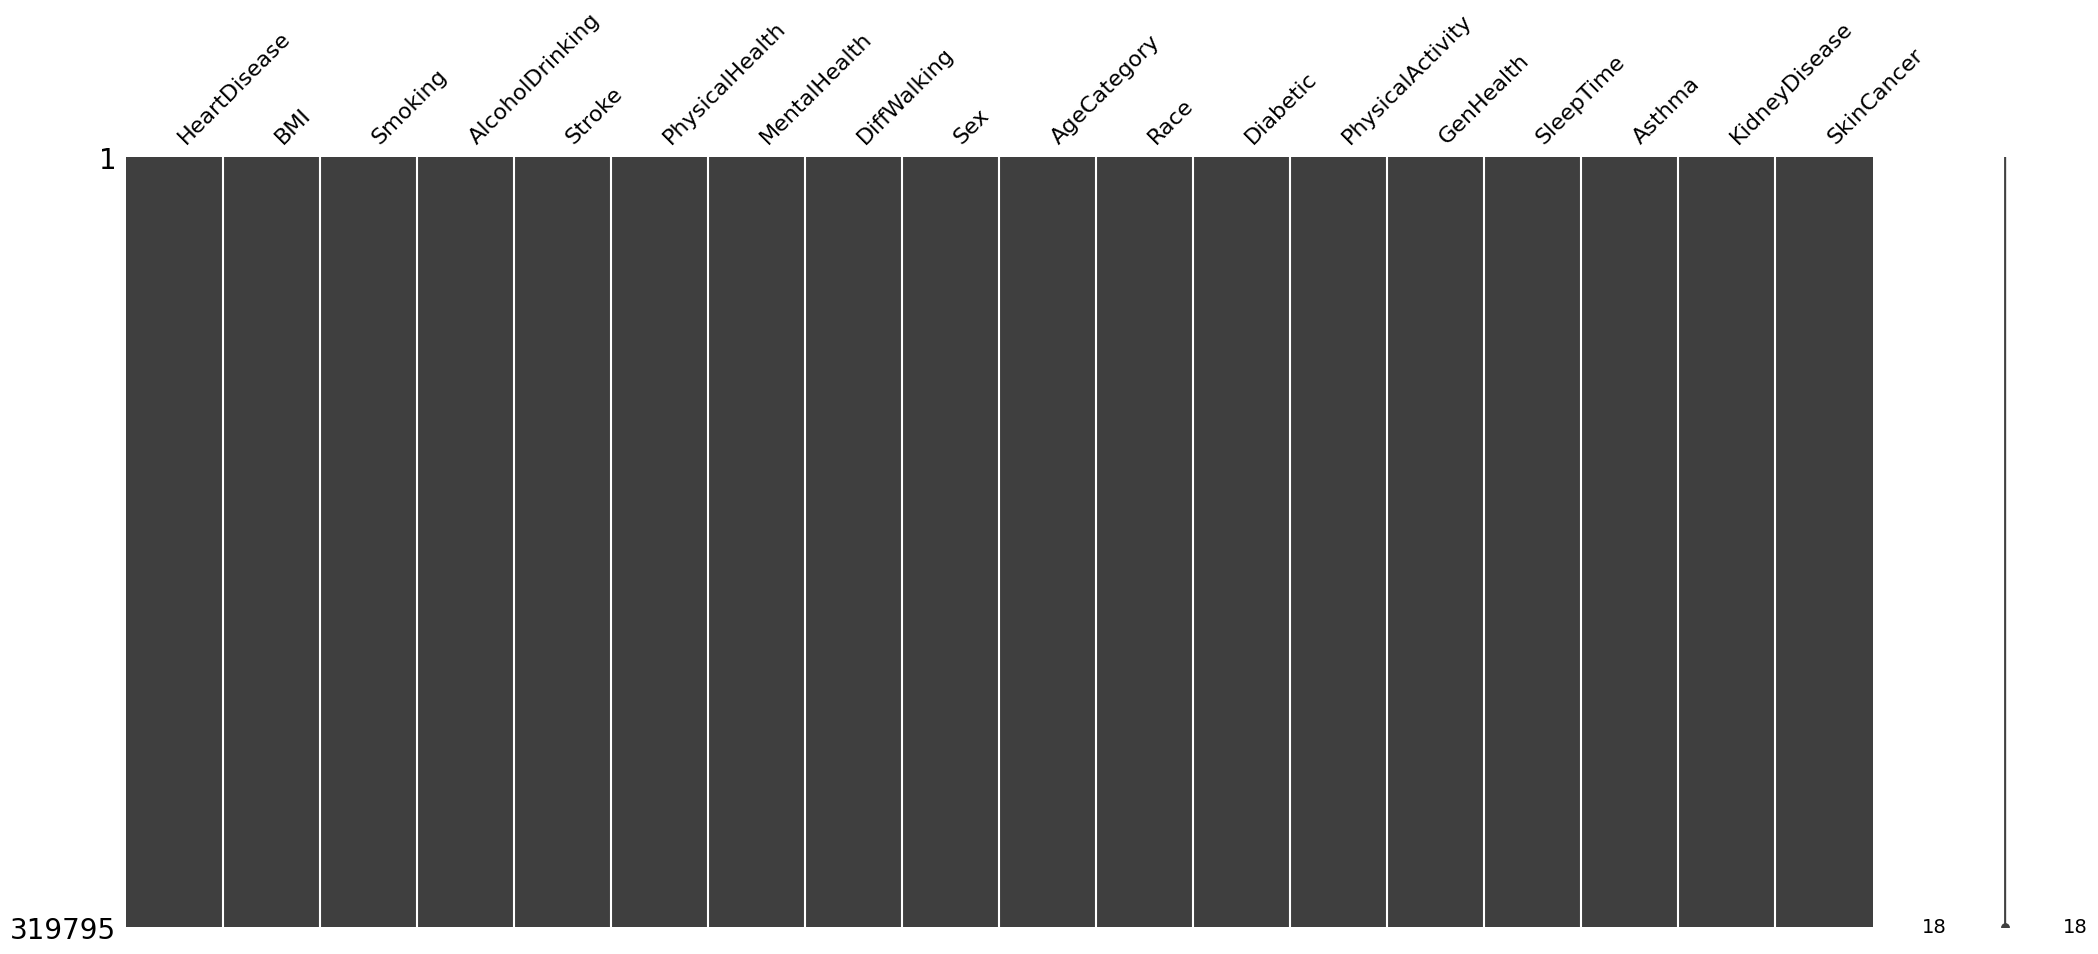

In [ ]:
# 결측치 확인
import missingno as msno
msno.matrix(df)

[HeartDisease] 인코딩 매핑:
  No → 0
  Yes → 1

[Smoking] 인코딩 매핑:
  No → 0
  Yes → 1

[AlcoholDrinking] 인코딩 매핑:
  No → 0
  Yes → 1

[Stroke] 인코딩 매핑:
  No → 0
  Yes → 1

[DiffWalking] 인코딩 매핑:
  No → 0
  Yes → 1

[Sex] 인코딩 매핑:
  Female → 0
  Male → 1

[AgeCategory] 인코딩 매핑:
  18-24 → 0
  25-29 → 1
  30-34 → 2
  35-39 → 3
  40-44 → 4
  45-49 → 5
  50-54 → 6
  55-59 → 7
  60-64 → 8
  65-69 → 9
  70-74 → 10
  75-79 → 11
  80 or older → 12

[Race] 인코딩 매핑:
  American Indian/Alaskan Native → 0
  Asian → 1
  Black → 2
  Hispanic → 3
  Other → 4
  White → 5

[Diabetic] 인코딩 매핑:
  No → 0
  No, borderline diabetes → 1
  Yes → 2
  Yes (during pregnancy) → 3

[PhysicalActivity] 인코딩 매핑:
  No → 0
  Yes → 1

[GenHealth] 인코딩 매핑:
  Excellent → 0
  Fair → 1
  Good → 2
  Poor → 3
  Very good → 4

[Asthma] 인코딩 매핑:
  No → 0
  Yes → 1

[KidneyDisease] 인코딩 매핑:
  No → 0
  Yes → 1

[SkinCancer] 인코딩 매핑:
  No → 0
  Yes → 1



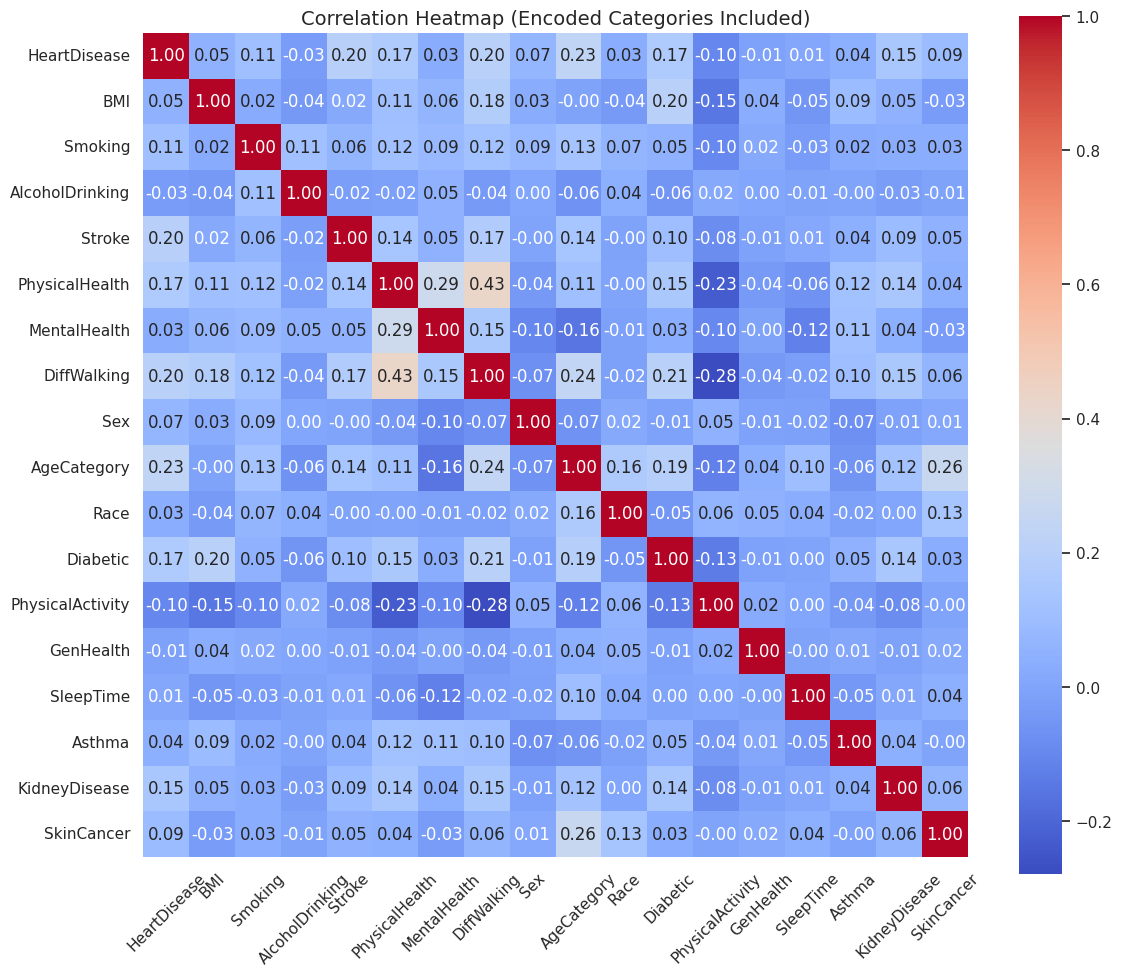

In [ ]:
#히트맵
#범주형 인코딩
from sklearn.preprocessing import LabelEncoder

data1 = df.copy()
encoders = {}

categorical_columns = data1.select_dtypes(include='object').columns

# 인코딩
for col in categorical_columns:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])
    encoders[col] = le

# 매핑 출력
for col in categorical_columns:
    le = encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"[{col}] 인코딩 매핑:")
    for k, v in mapping.items():
        print(f"  {k} → {v}")
    print()

# 수치형 변수만 선택 (인코딩된 값 포함)
encoded_df = data1.select_dtypes(include=['number'])

# 상관계수 계산
corr_matrix = encoded_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Encoded Categories Included)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

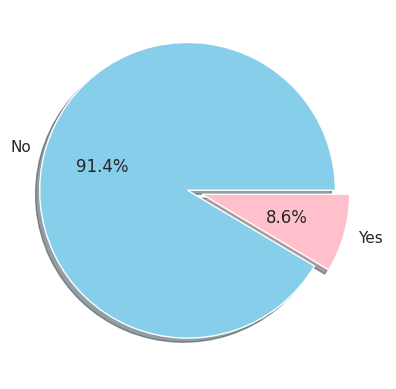

In [ ]:
#심장병 유무 발병 비율
plt.pie(df['HeartDisease'].value_counts(), labels=df['HeartDisease'].unique(), autopct='%1.1f%%', shadow=True, explode=[0.1, 0], colors=['skyblue', 'pink'])
plt.show()

In [ ]:
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_Category']
numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

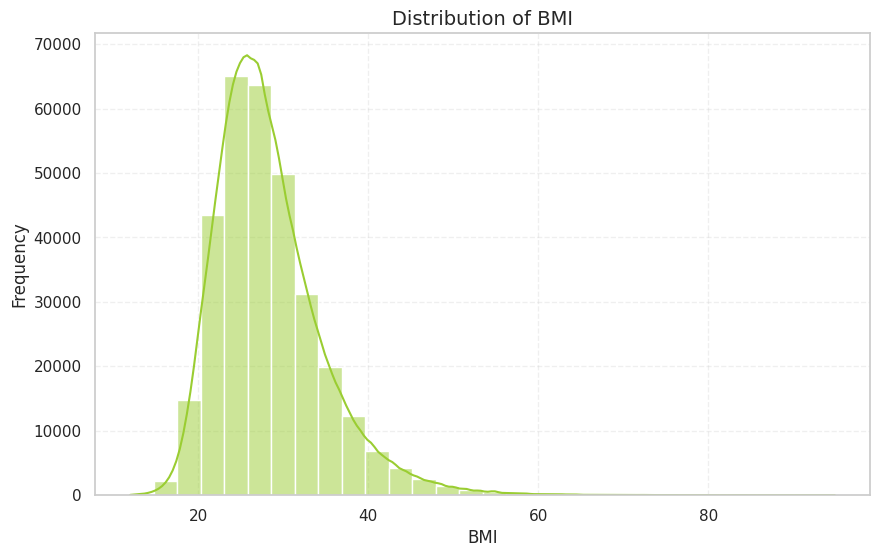

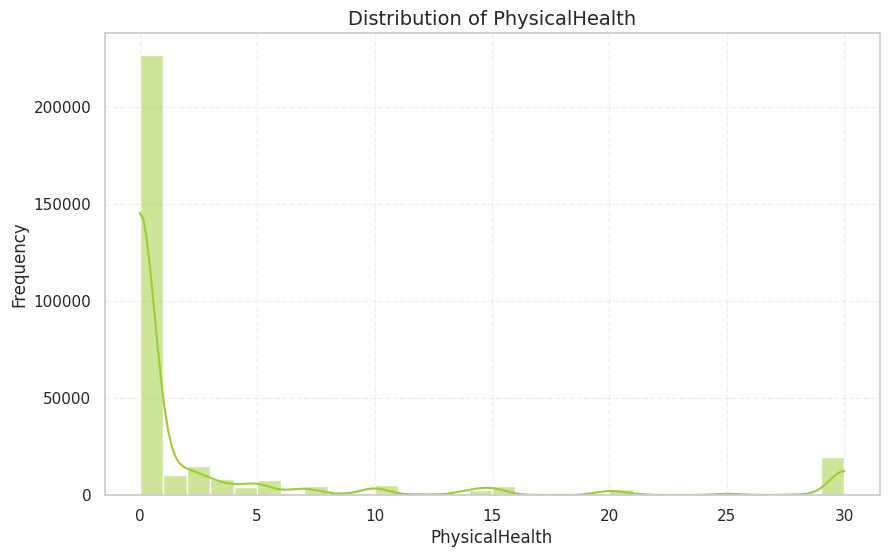

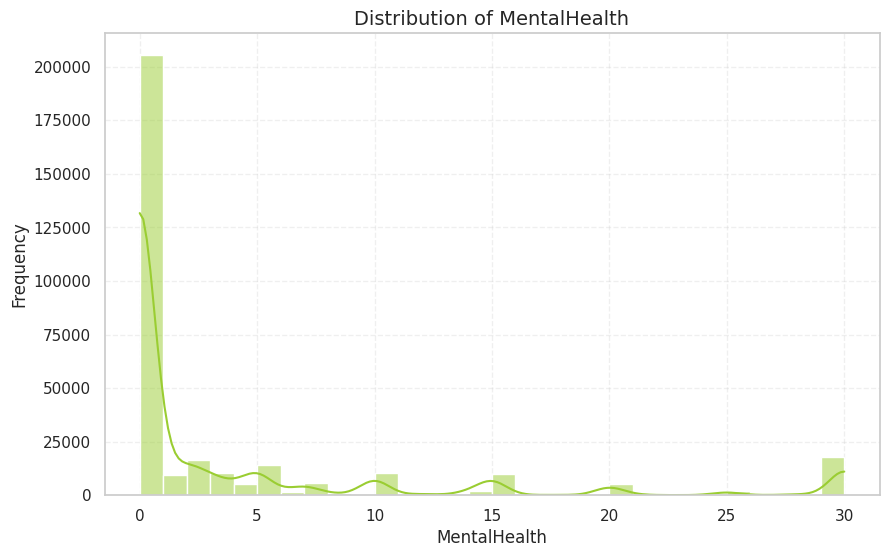

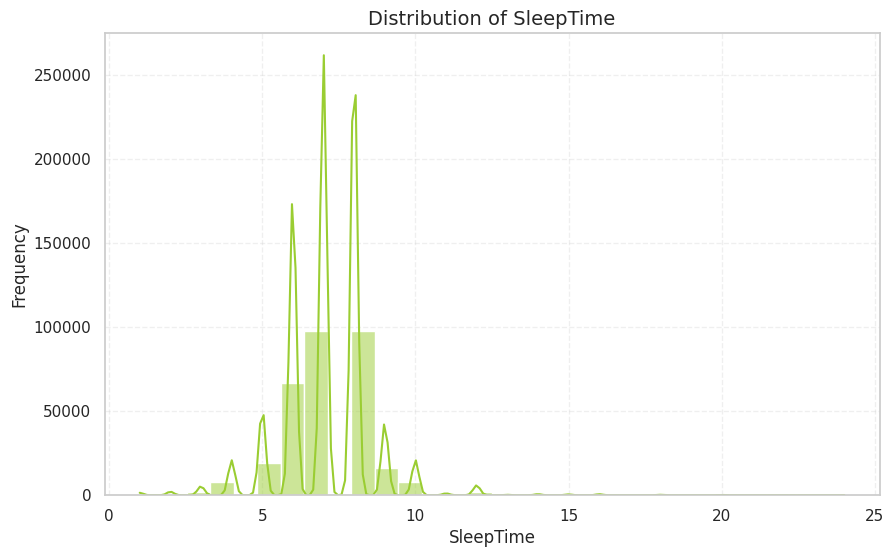

In [ ]:
# 각 변수별로 분포 확인
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True, color='yellowgreen', bins=30)
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()
    print()

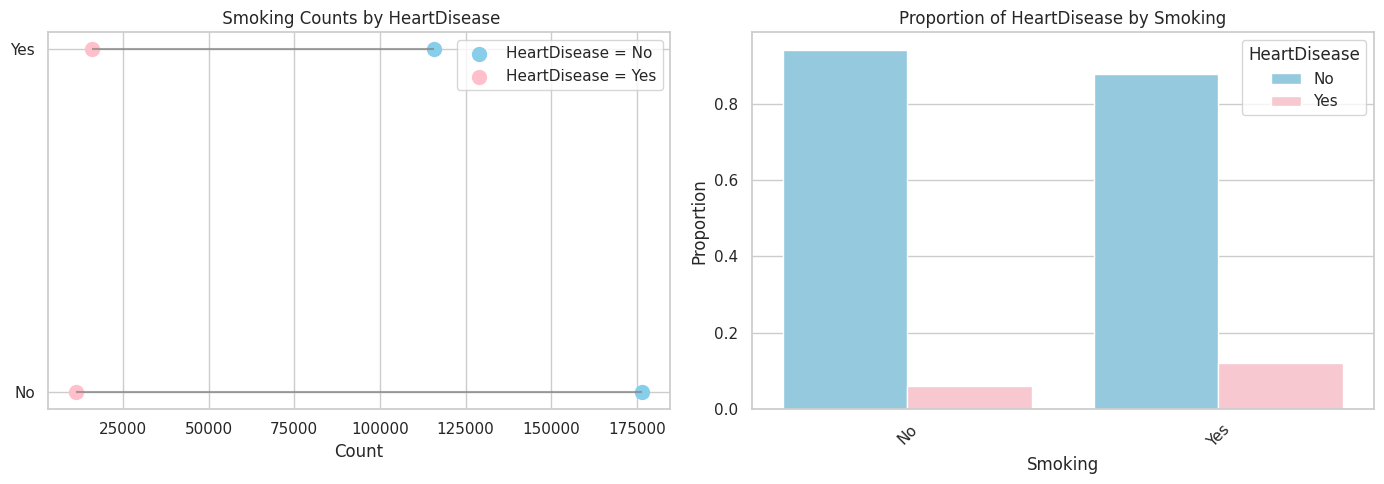

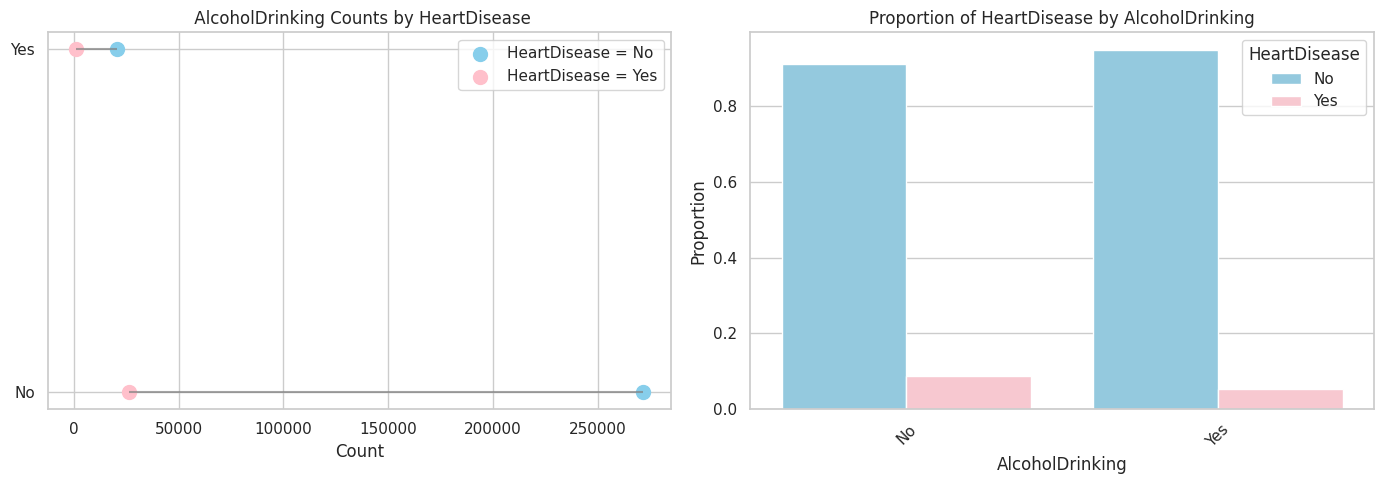

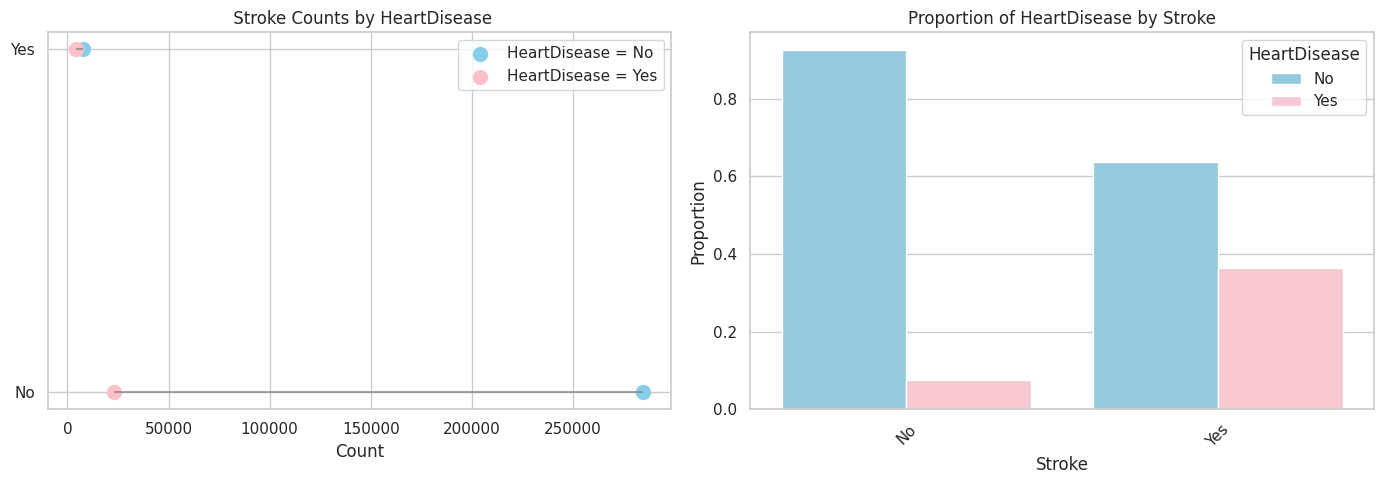

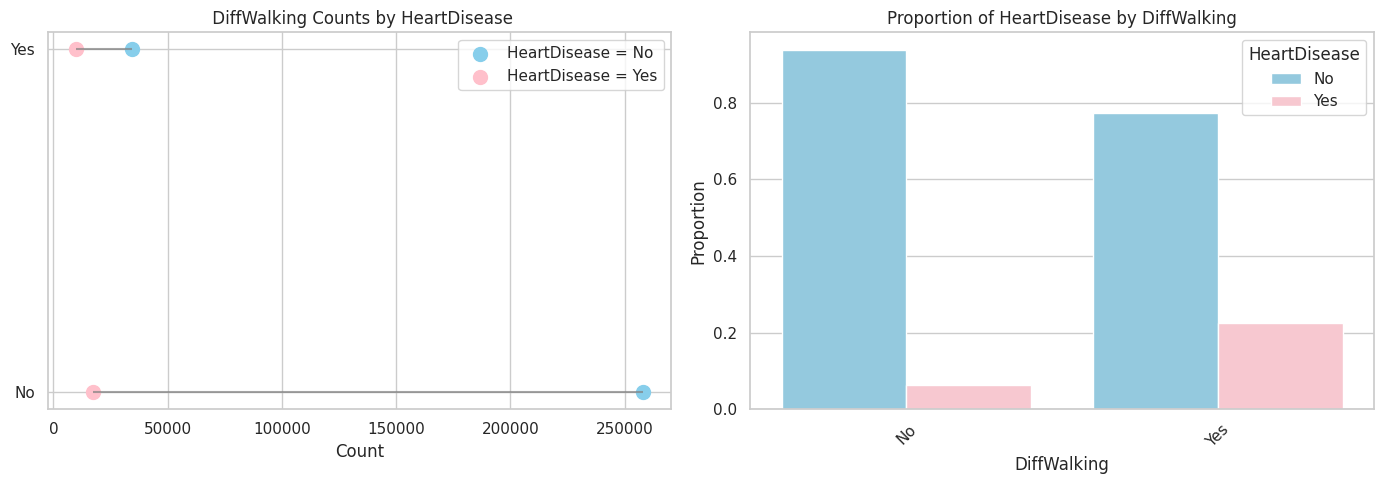

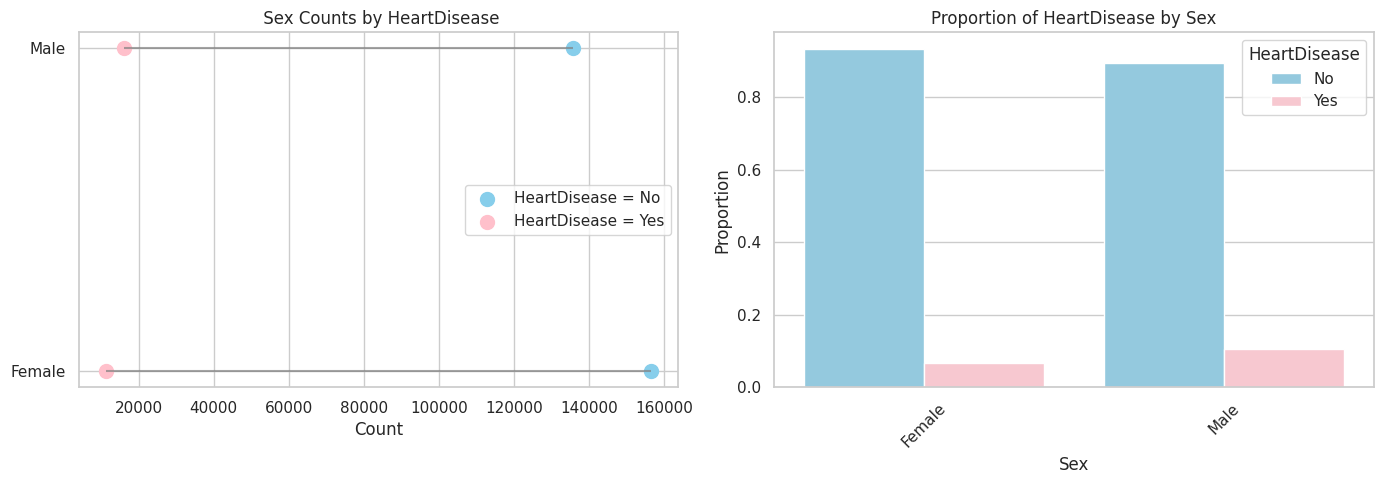

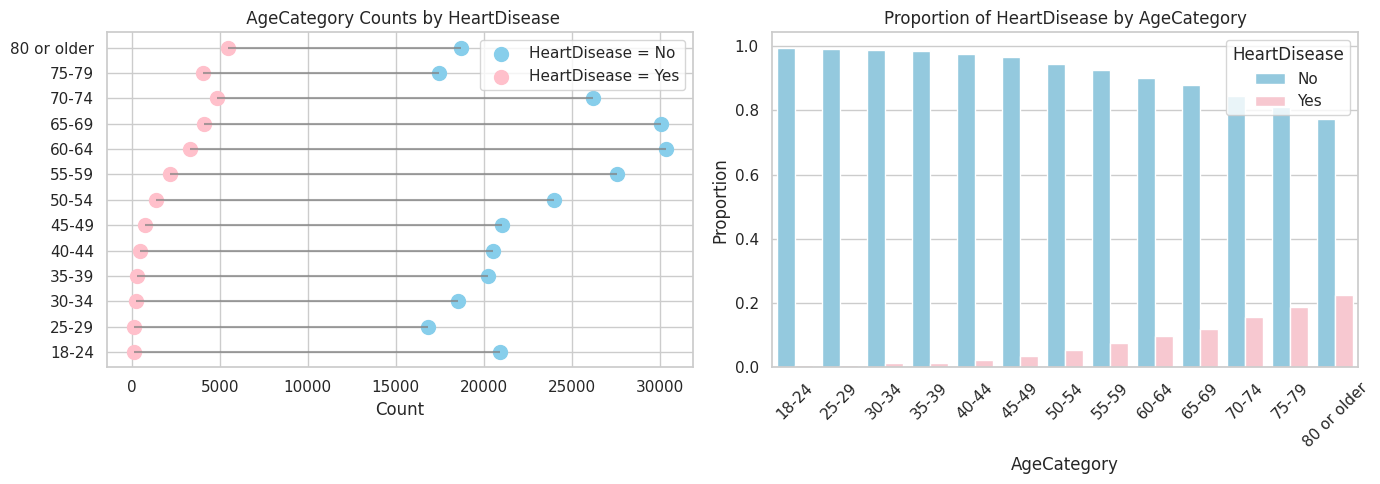

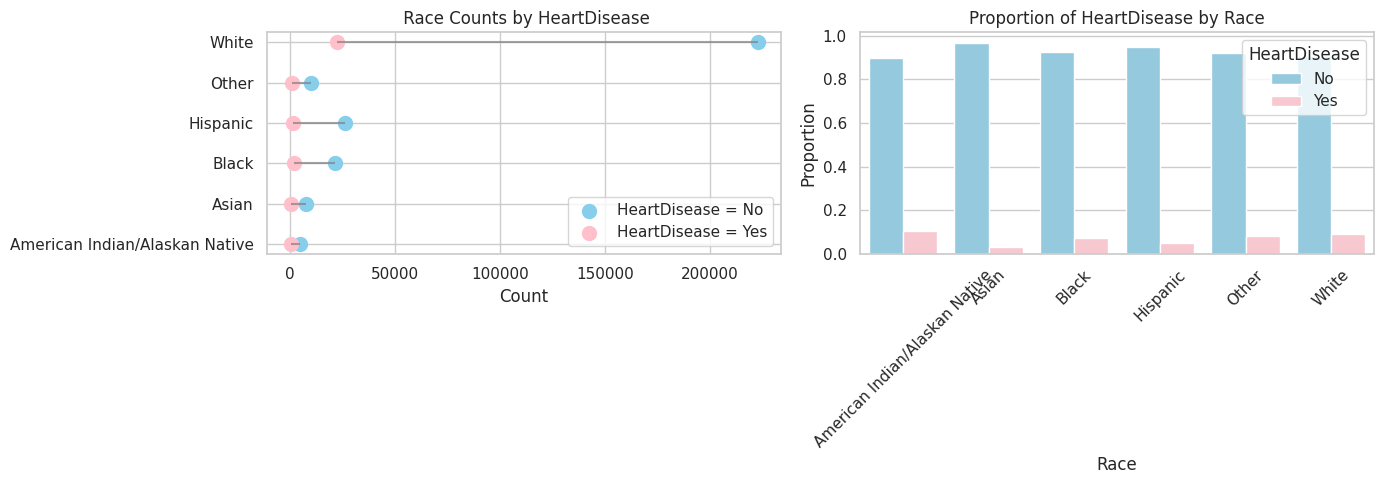

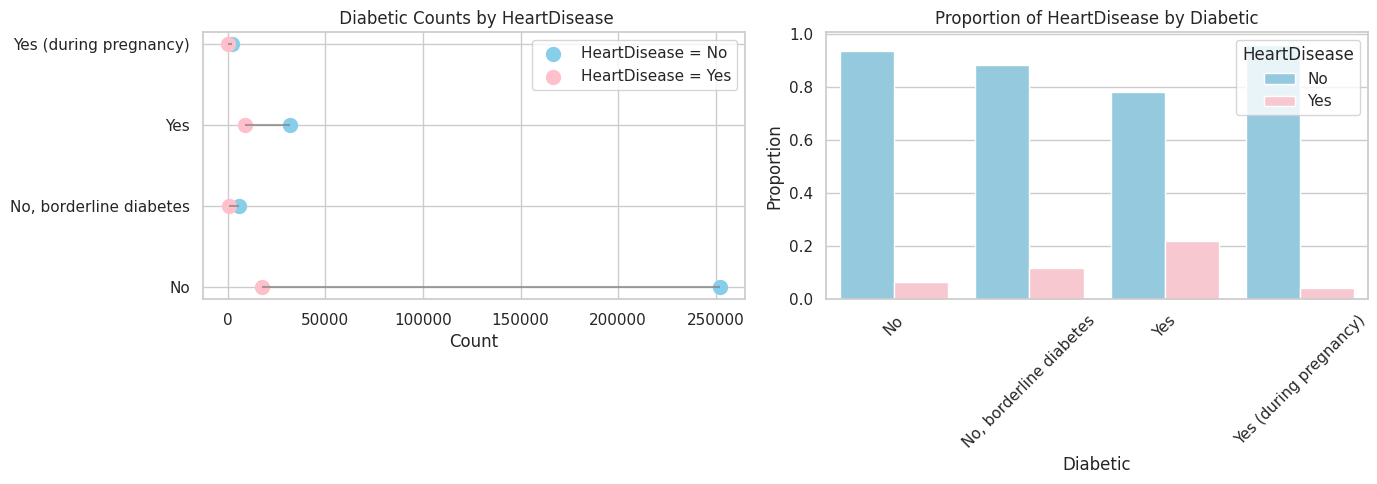

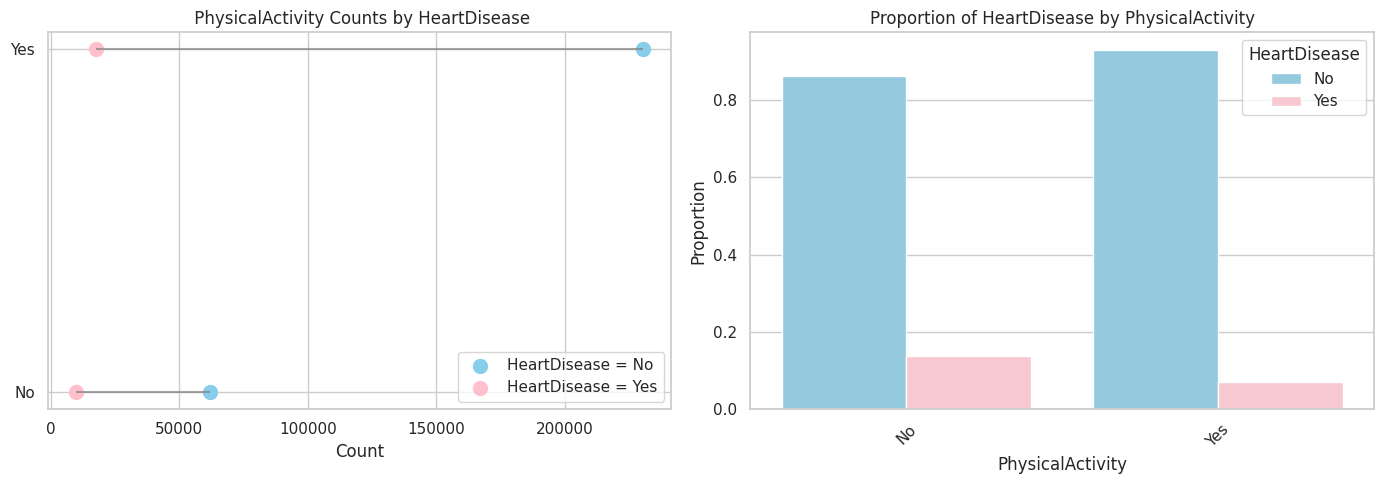

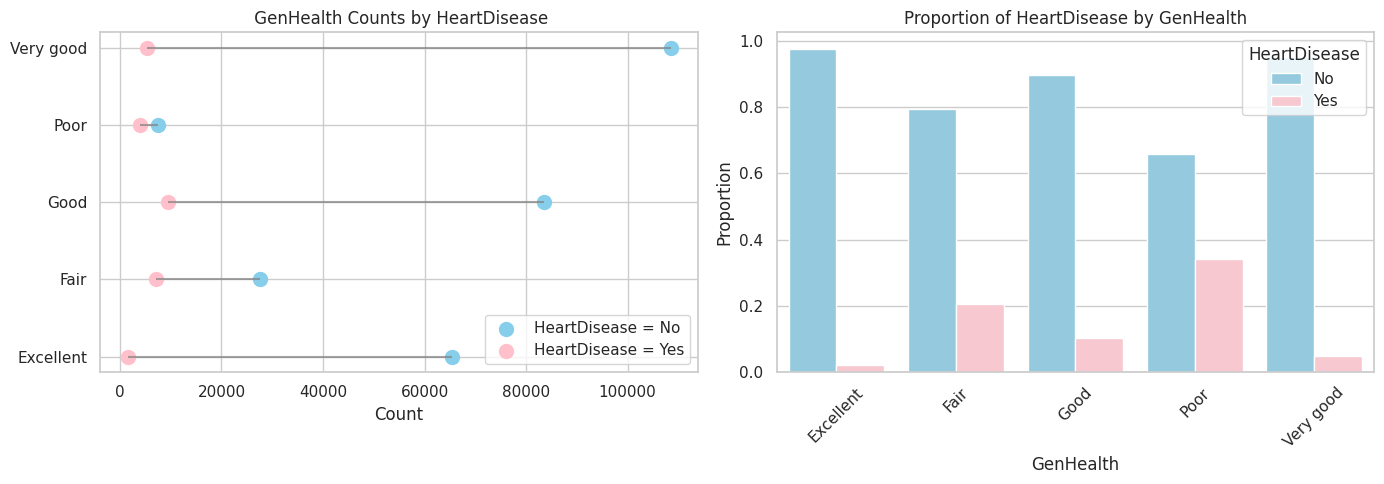

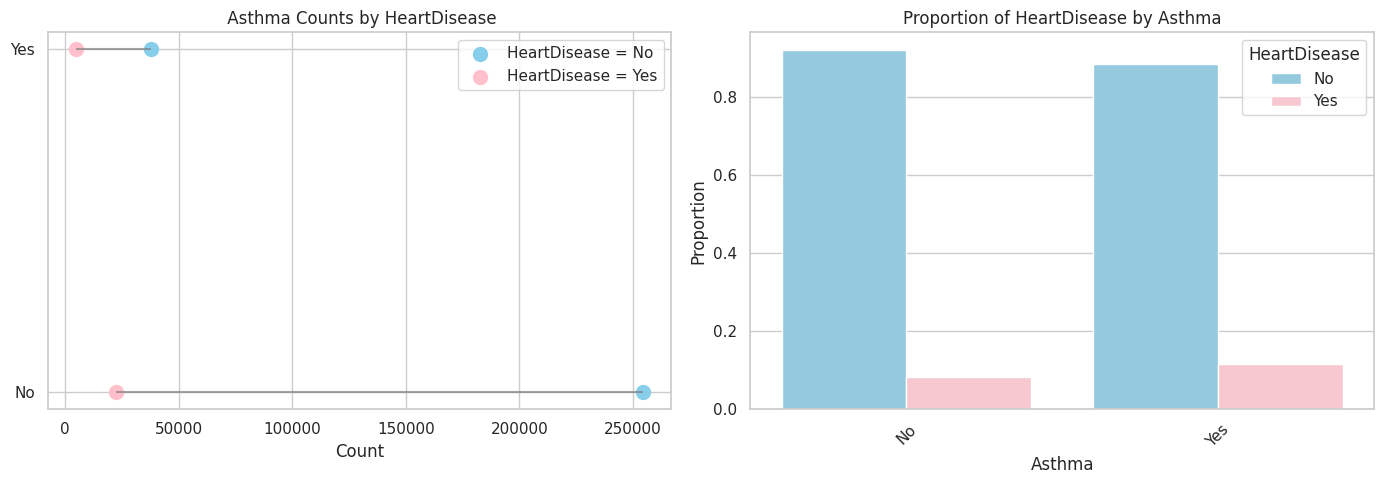

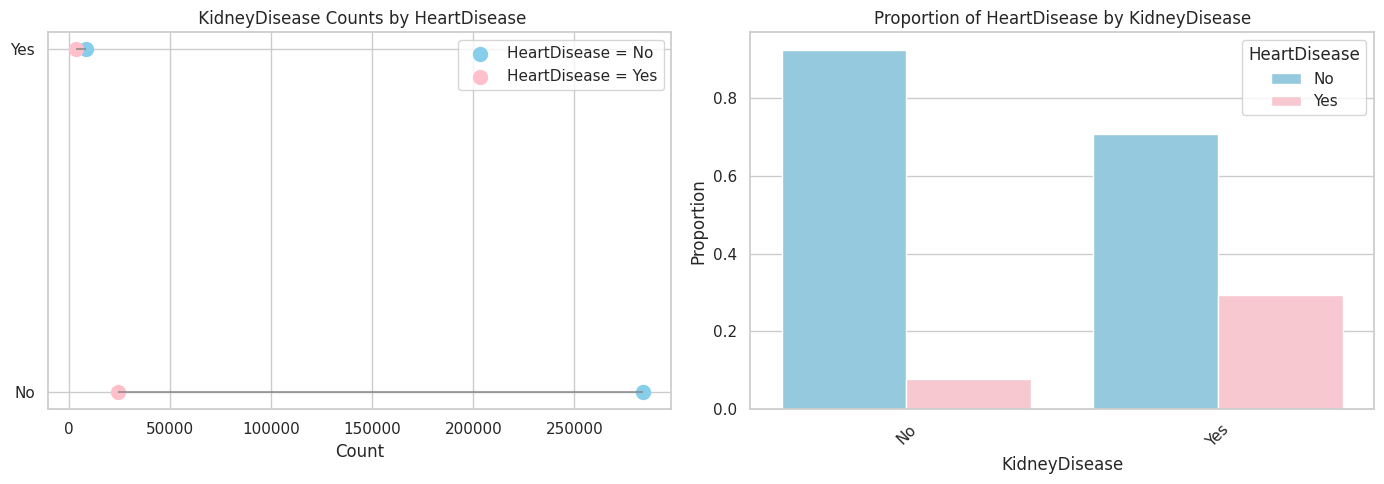

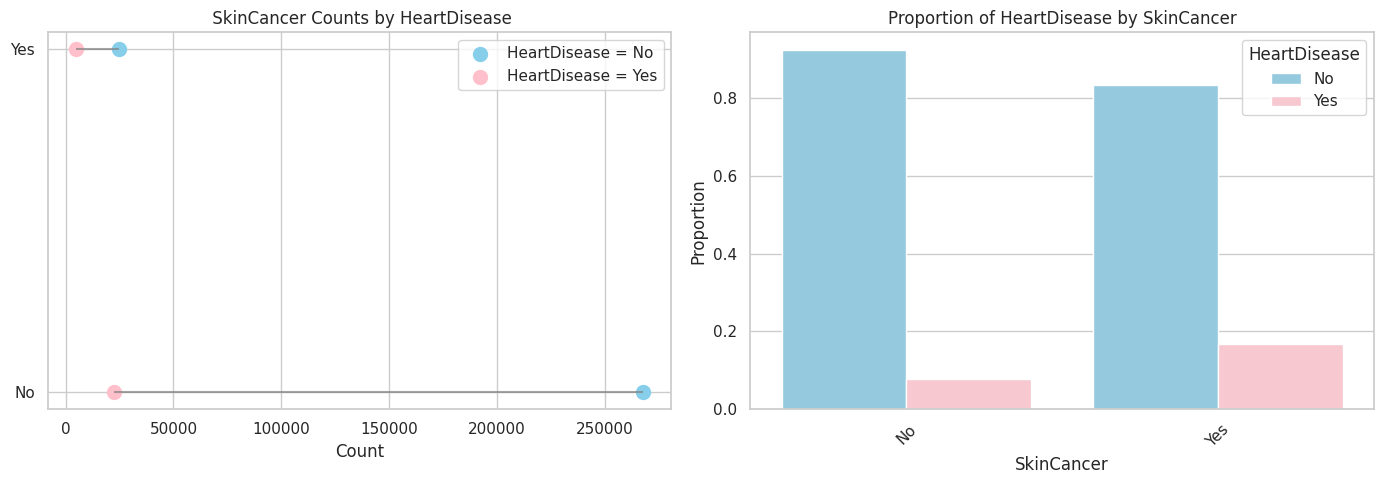

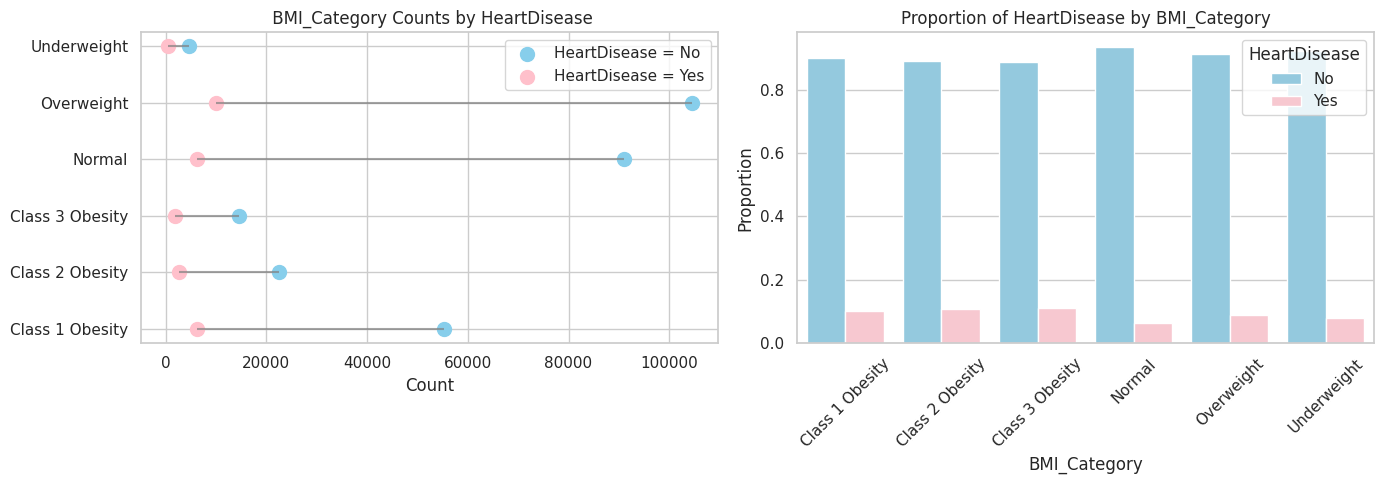

In [ ]:
custom_palette = {
    'Yes': 'pink',
    'No': 'skyblue'
}

for var in categorical_cols:
    fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

    # --- 왼쪽: Dumbbell Plot (Raw Count 비교) ---
    # 각 범주의 HeartDisease별 count 계산
    counts = df.groupby([var, 'HeartDisease']).size().unstack()
    # counts의 인덱스: 각 범주의 label
    categories = counts.index.tolist()
    # y 위치: 각 범주에 대해 0,1,2,...
    y_pos = list(range(len(categories)))

    # 각 범주별 "No"와 "Yes" count (존재하지 않는 경우 0으로 처리)
    count_no = counts['No'].tolist() if 'No' in counts.columns else [0] * len(categories)
    count_yes = counts['Yes'].tolist() if 'Yes' in counts.columns else [0] * len(categories)

    # 각 범주별로 두 그룹 count를 선으로 연결
    axes[0].hlines(y=y_pos, xmin=count_no, xmax=count_yes, color='gray', alpha=0.7)
    # 각 그룹의 점 표시
    axes[0].scatter(count_no, y_pos, color=custom_palette['No'], s=100, label='HeartDisease = No')
    axes[0].scatter(count_yes, y_pos, color=custom_palette['Yes'], s=100, label='HeartDisease = Yes')

    axes[0].set_yticks(y_pos)
    axes[0].set_yticklabels(categories)
    axes[0].set_xlabel("Count")
    axes[0].set_title(f" {var} Counts by HeartDisease")
    axes[0].legend()

    # --- 오른쪽: Proportion Barplot ---
    # 각 범주 내에서 HeartDisease 비율(정규화된 값) 계산
    temp = df.groupby(var)['HeartDisease'].value_counts(normalize=True)\
             .rename("Proportion").reset_index()
    sns.barplot(
        data=temp,
        x=var,
        y="Proportion",
        hue="HeartDisease",
        palette=custom_palette,
        ax=axes[1]
    )
    axes[1].set_title(f"Proportion of HeartDisease by {var}")
    axes[1].set_xlabel(var)
    axes[1].set_ylabel("Proportion")
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

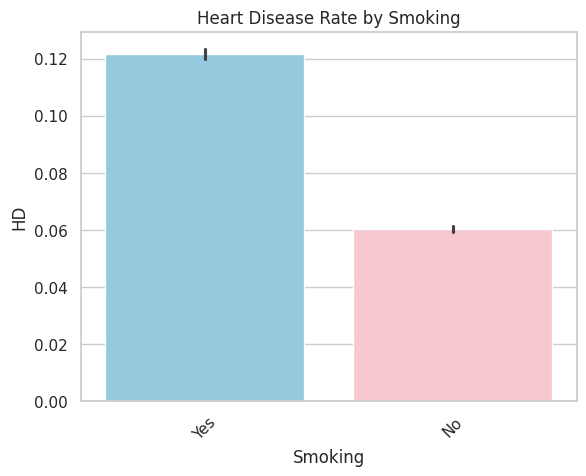

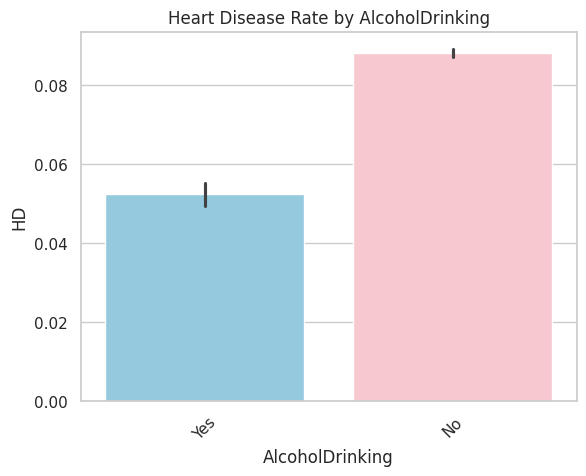

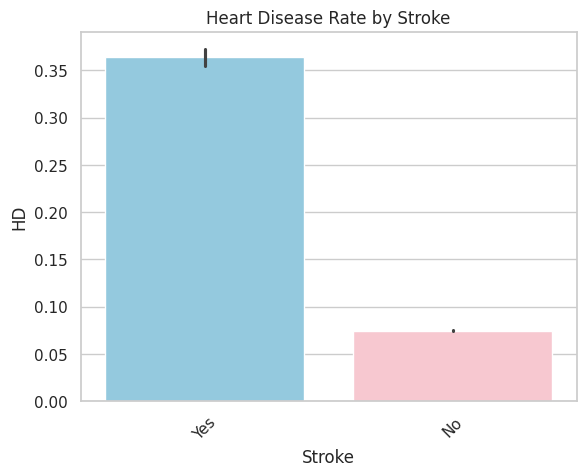

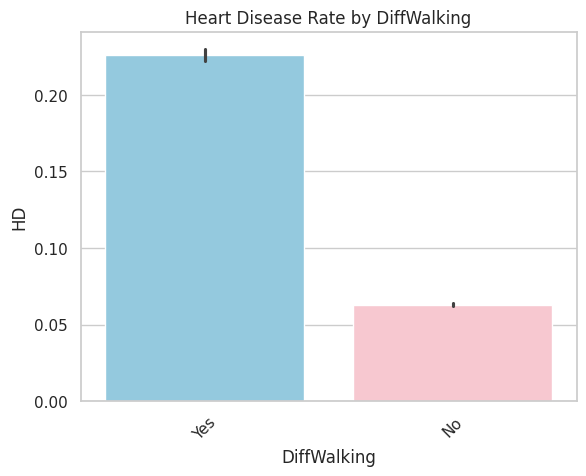

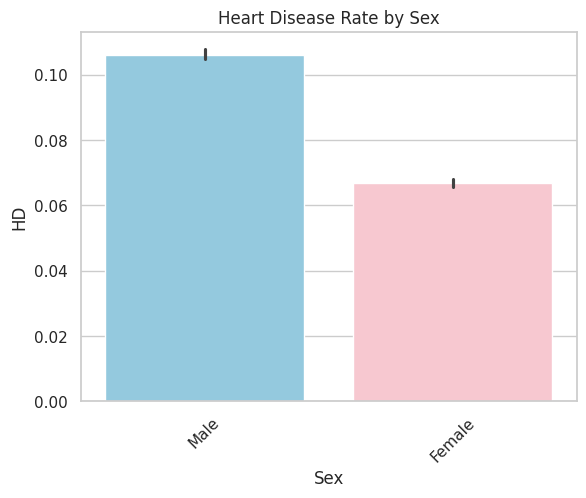

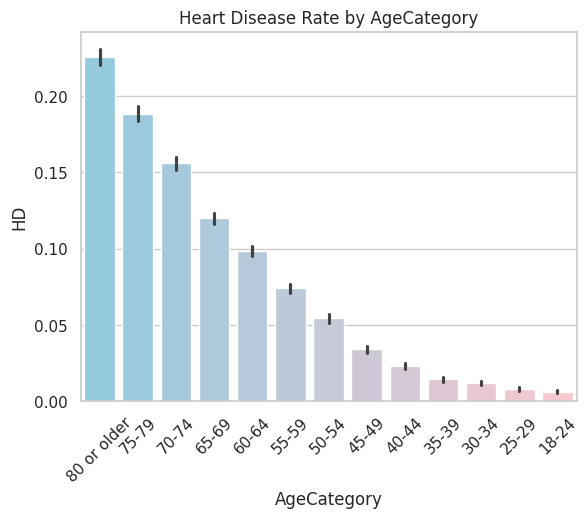

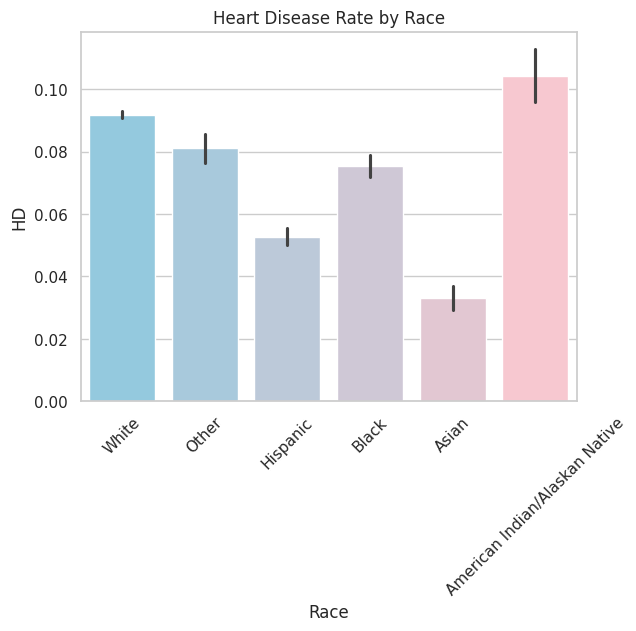

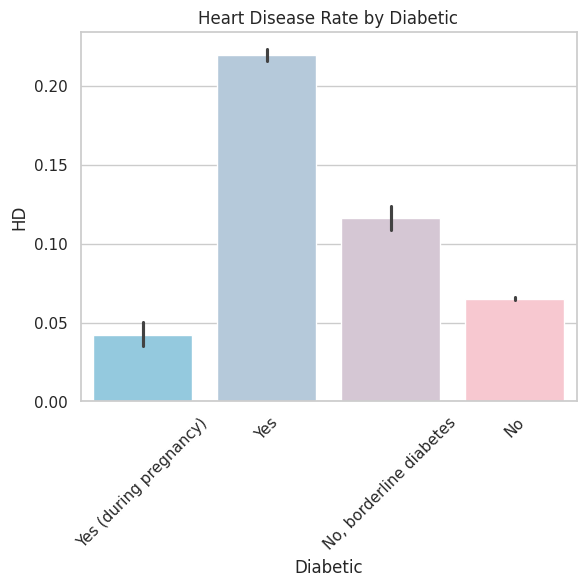

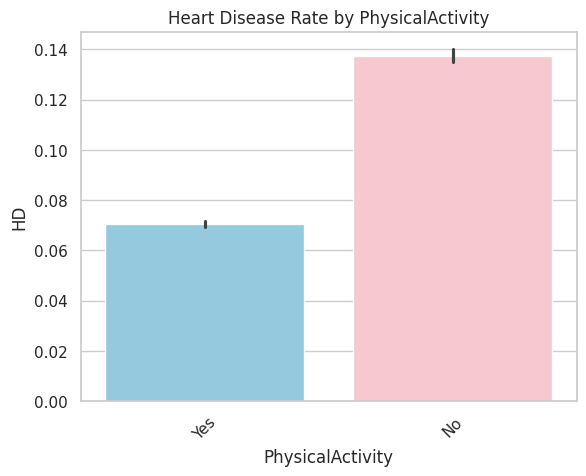

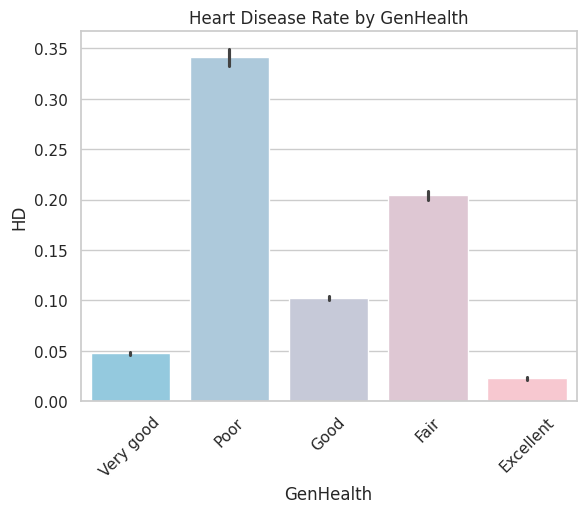

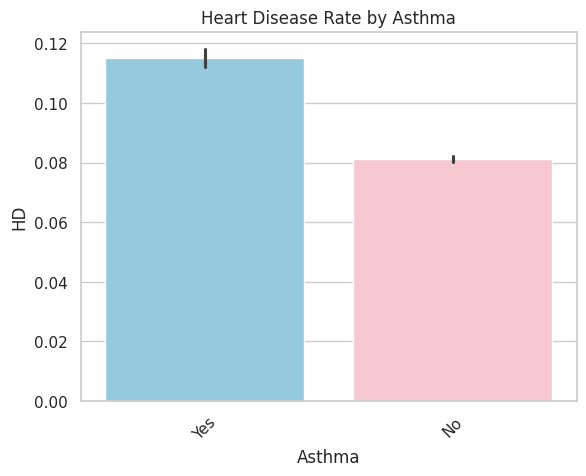

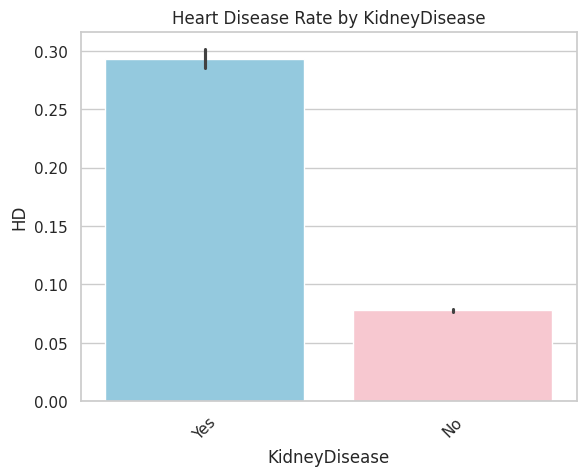

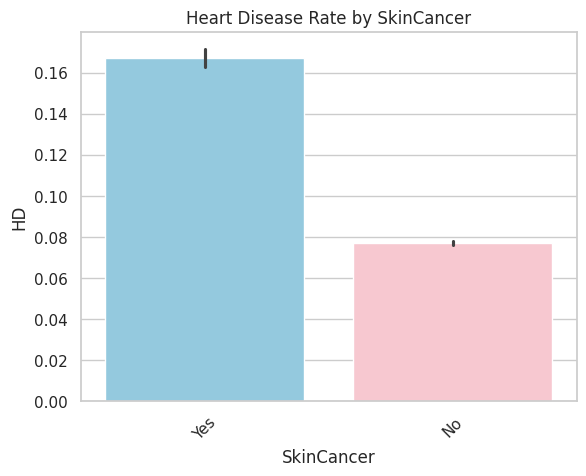

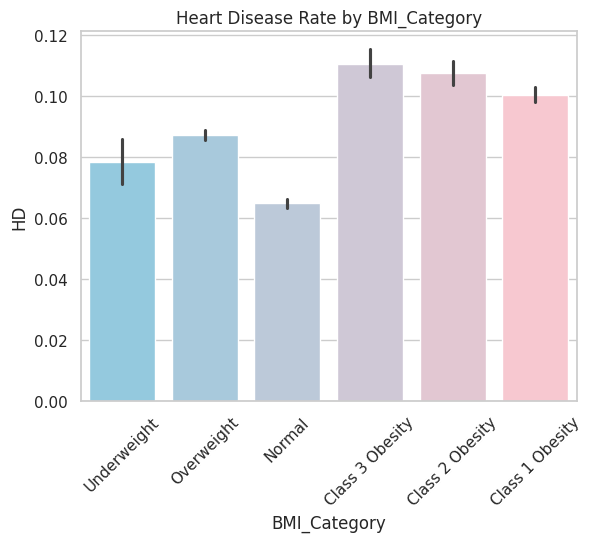

In [ ]:
# 범주형 변수별 심장질환 발병률 시각화
df['HD'] = df['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)
# HD: 심장 질환 여부, Yes=1, No=0
for col in categorical_cols:
    sns.barplot(x=col, y='HD', data=df, estimator='mean', order=sorted(df[col].dropna().unique(), reverse=True), palette='blend:skyblue,pink')
    plt.title(f'Heart Disease Rate by {col}')
    plt.xticks(rotation=45)
    plt.show()

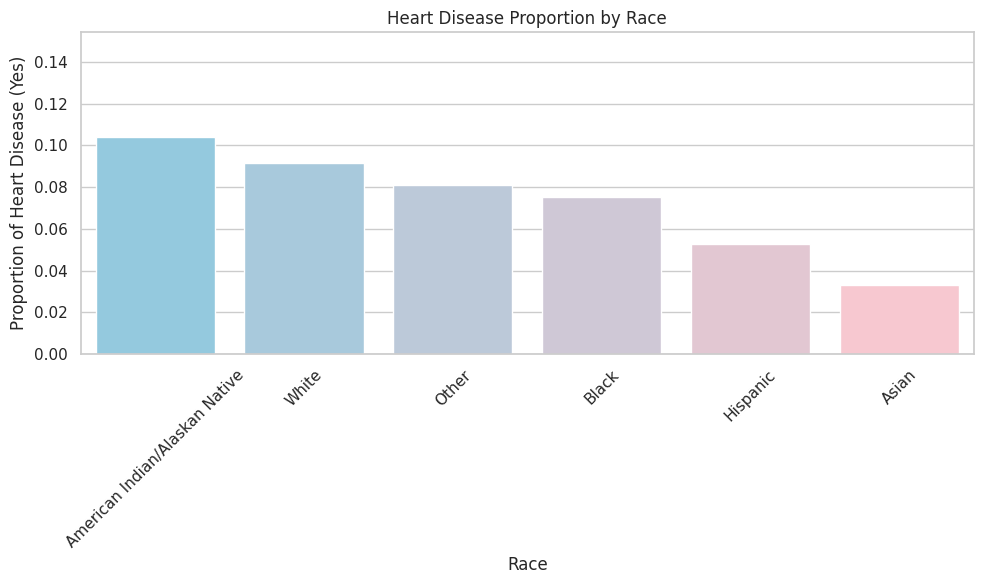

In [ ]:
# 인종별 심장병 발생 유무

# 인종별 심장병 발생 비율 계산
race_hd_ratio = (
    df.groupby('Race')['HeartDisease']
    .value_counts(normalize=True)
    .rename('Proportion')
    .reset_index()
)

# HeartDisease=Yes만 필터링
race_hd_yes = race_hd_ratio[race_hd_ratio['HeartDisease'] == 'Yes']

# 정렬
race_hd_yes = race_hd_yes.sort_values('Proportion', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=race_hd_yes, x='Race', y='Proportion', palette='blend:skyblue,pink')
plt.title("Heart Disease Proportion by Race")
plt.ylabel("Proportion of Heart Disease (Yes)")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.ylim(0, race_hd_yes['Proportion'].max() + 0.05)


plt.tight_layout()
plt.show()

<Axes: xlabel='SleepTime'>

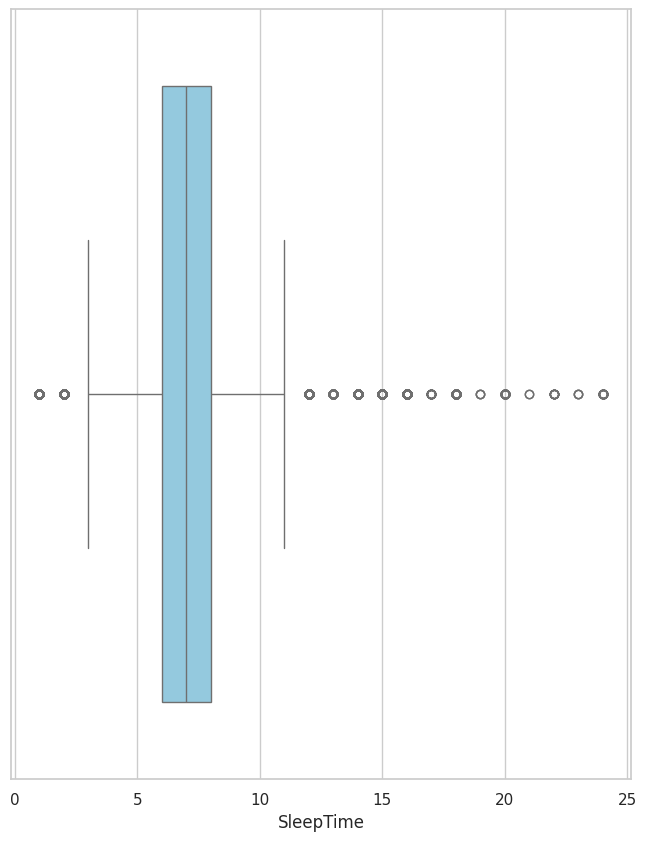

In [ ]:
plt.figure(figsize=(8, 10))
sns.boxplot(data=df, x='SleepTime', palette='blend:skyblue,pink')

<Axes: xlabel='SleepTime', ylabel='Count'>

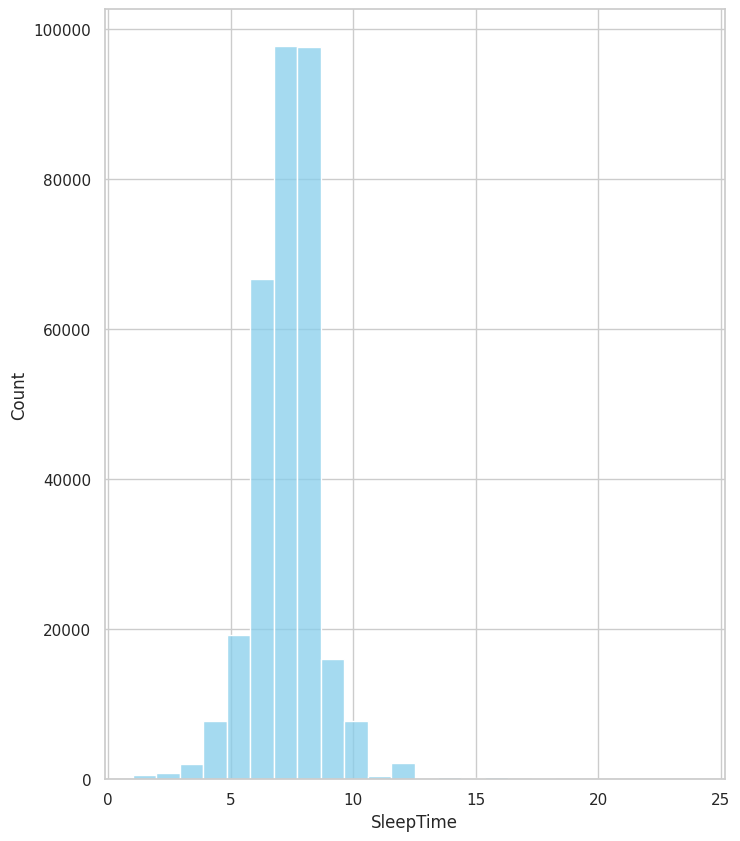

In [ ]:
plt.figure(figsize=(8, 10))
sns.histplot(data=df, x='SleepTime', bins=24, color='skyblue')

# 4.2) 기초 전처리
- SleepTime 이상치: 값이 24까지 존재, 명확한 시간 기준을 정할 근거자료 없어 IQR로 처리

- BMI: CDC 기준에 따라 범주화한 변수 'BMI_Categoty' 생성

- 범주형 인코딩
    - 순서형 변수 라벨 인코딩
    - 나머지 변수 원-핫 인코딩

- 왜도 심한 수치형 변수 로그 변환


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/toy_HeartDiseases/heart_2020_cleaned.csv")

In [ ]:
# 수면시간 이상치
Q1 = df['SleepTime'].quantile(0.25)
Q3 = df['SleepTime'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['SleepTime'] >= lower_bound) & (df['SleepTime'] <= upper_bound)]

In [ ]:
# BMI 범주화
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    elif bmi < 35:
        return 'Class 1 Obesity'
    elif bmi < 40:
        return 'Class 2 Obesity'
    else:
        return 'Class 3 Obesity'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

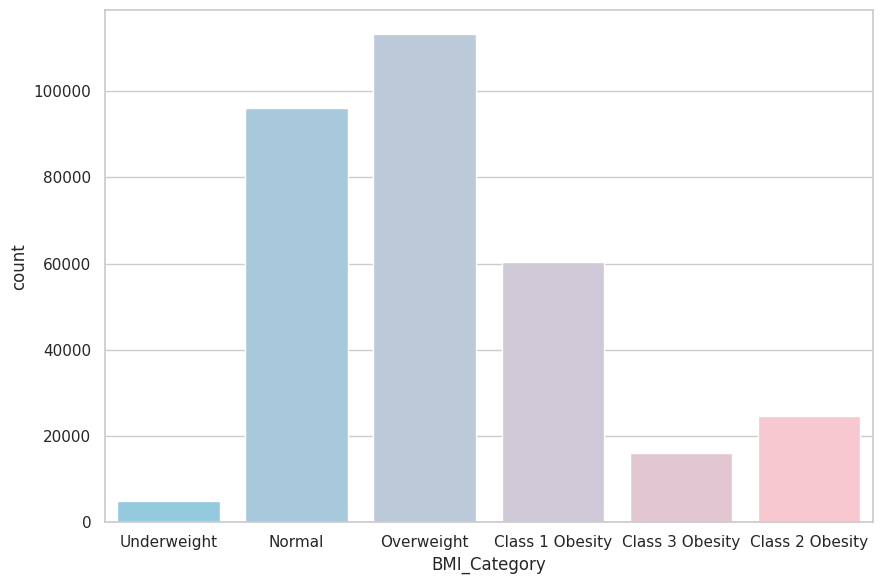

In [ ]:
plt.figure(figsize=(9, 6))
sns.countplot(x='BMI_Category', data=df, palette='blend:skyblue,pink')
plt.tight_layout()
plt.show()

In [ ]:
# 순서형 변수 라벨 인코딩
ordinal_cols = {
    'GenHealth': ['Poor', 'Fair', 'Good', 'Very good', 'Excellent'],
    'AgeCategory': ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49',
                    '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
    'BMI_Category': ['Underweight', 'Normal', 'Overweight',
                     'Class 1 Obesity', 'Class 2 Obesity', 'Class 3 Obesity']
}
for col, order in ordinal_cols.items():
    df[col] = pd.Categorical(df[col], categories=order, ordered=True)
    df[col] = df[col].cat.codes

# One-hot 인코딩 (drop_first=True로 다중공선성 방지)
df = pd.get_dummies(df, columns=[
    'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex','Race','Diabetic',
    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer',
], drop_first=True)

In [ ]:
# 로그 변환
df['PhysicalHealth'] = np.log1p(df['PhysicalHealth'])
df['MentalHealth'] = np.log1p(df['MentalHealth'])

In [ ]:
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [ ]:
df.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,GenHealth,SleepTime,BMI_Category,Smoking_Yes,AlcoholDrinking_Yes,...,Race_Hispanic,Race_Other,Race_White,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,1.386294,3.433987,7,3,5.0,0,True,False,...,False,False,True,False,True,False,True,True,False,True
1,0,20.34,0.000000,0.000000,12,3,7.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False
2,0,26.58,3.044522,3.433987,9,1,8.0,2,True,False,...,False,False,True,False,True,False,True,True,False,False
3,0,24.21,0.000000,0.000000,11,2,6.0,1,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0,23.71,3.367296,0.000000,4,3,8.0,1,False,False,...,False,False,True,False,False,False,True,False,False,False


# 4.3) 가설검정

## A) 모든 변수에 대한 유의성 검정

### i) 범주형 변수: 카이제곱검정

In [ ]:
from scipy import stats
from statsmodels.stats.multitest import multipletests
import pandas as pd

# 타겟 변수와 범주형 변수가 통계적으로 유의한 관계에 있는가 - 카이제곱검정
categorical_cols = ['Smoking', 'AlcoholDrinking', 'Stroke',
                    'DiffWalking', 'Sex', 'AgeCategory', 'Race',
                    'Diabetic', 'PhysicalActivity', 'GenHealth',
                    'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_Category']

# p-values 리스트를 저장할 빈 리스트
p_values = []

# 카이제곱 검정 수행
for i in range(len(categorical_cols)):
    df_chi2 = pd.crosstab(df["HeartDisease"], df[categorical_cols[i]])
    result = stats.chi2_contingency(df_chi2, correction=False)

    # p-value 저장
    p_values.append(result[1])
    print(df_chi2)
    print(f"{categorical_cols[i]} p-value : {result[1]:.10f}")
    print("\n")

# FDR 보정 (Benjamini-Hochberg) 적용
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

# 보정된 p-value 출력
for i, (pval, reject) in enumerate(zip(pvals_corrected, rejected)):
    print(f"{categorical_cols[i]} (FDR 보정 후 p-value) : {pval:.5f}")

Smoking           No     Yes
HeartDisease                
No            174572  114079
Yes            11063   15538
Smoking p-value : 0.0000000000


AlcoholDrinking      No    Yes
HeartDisease                  
No               268248  20403
Yes               25505   1096
AlcoholDrinking p-value : 0.0000000000


Stroke            No   Yes
HeartDisease              
No            281210  7441
Yes            22448  4153
Stroke p-value : 0.0000000000


DiffWalking       No    Yes
HeartDisease               
No            255482  33169
Yes            17063   9538
DiffWalking p-value : 0.0000000000


Sex           Female    Male
HeartDisease                
No            154516  134135
Yes            10868   15733
Sex p-value : 0.0000000000


AgeCategory   18-24  25-29  30-34  35-39  40-44  45-49  50-54  55-59  60-64  \
HeartDisease                                                                  
No            20674  16658  18365  20048  20298  20814  23713  27195  29961   
Yes            

In [ ]:
for i in range(len(categorical_cols)):
    df_chi2 = pd.crosstab(df["HeartDisease"], df[categorical_cols[i]])
    result = stats.chi2_contingency(df_chi2, correction=False)
    print(categorical_cols[i] + " p-value : {:.10f}".format(result[1]))

Smoking p-value : 0.0000000000
AlcoholDrinking p-value : 0.0000000000
Stroke p-value : 0.0000000000
DiffWalking p-value : 0.0000000000
Sex p-value : 0.0000000000
AgeCategory p-value : 0.0000000000
Race p-value : 0.0000000000
Diabetic p-value : 0.0000000000
PhysicalActivity p-value : 0.0000000000
GenHealth p-value : 0.0000000000
Asthma p-value : 0.0000000000
KidneyDisease p-value : 0.0000000000
SkinCancer p-value : 0.0000000000
BMI_Category p-value : 0.0000000000


### ii) 수치형 변수: 로지스틱 회귀
수치형 변수가 심장병일 확률에 영향을 미치는가?



In [ ]:
df['SleepDeviation'] = abs(df['SleepTime'] - 7)
# 수면시간의 비선형적 영향-센터링으로 반영
numeric_cols = ['PhysicalHealth', 'MentalHealth', 'SleepDeviation']

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.stats.multitest import multipletests

p_values = []
coefs = []
odds_ratios = []

for col in numeric_cols:
    X = sm.add_constant(df[[col]])
    y = df['HeartDisease']
    model = sm.Logit(y, X).fit(disp=0)

    coef = model.params[col]
    p_value = model.pvalues[col]
    odds_ratio = np.exp(coef)

    coefs.append(coef)
    p_values.append(p_value)
    odds_ratios.append(odds_ratio)

# FDR 보정
rejected, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

for i, col in enumerate(numeric_cols):
    print(f"{col}")
    print(f"  Coefficient     : {coefs[i]:.4f}")
    print(f"  Raw p-value     : {p_values[i]:.4f}")
    print(f"  Adjusted p-value: {pvals_corrected[i]:.4f}")
    print(f"  Odds Ratio      : {odds_ratios[i]:.4f}")

PhysicalHealth
  Coefficient     : 0.0519
  Raw p-value     : 0.0000
  Adjusted p-value: 0.0000
  Odds Ratio      : 1.0533
MentalHealth
  Coefficient     : 0.0106
  Raw p-value     : 0.0000
  Adjusted p-value: 0.0000
  Odds Ratio      : 1.0107
SleepDeviation
  Coefficient     : 0.2953
  Raw p-value     : 0.0000
  Adjusted p-value: 0.0000
  Odds Ratio      : 1.3435


## B) AlchoholDrinking

<Axes: xlabel='AlcoholDrinking'>

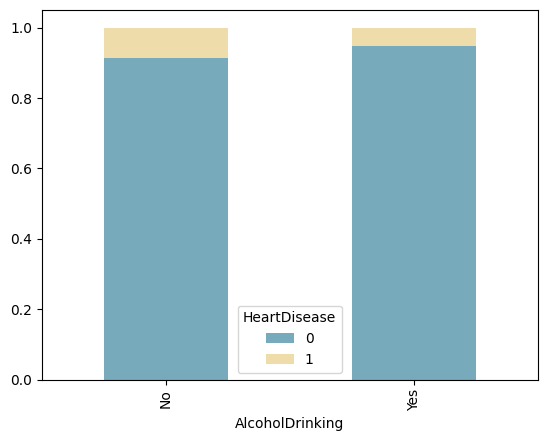

In [ ]:
# EDA를 통해 과음하는 사람의 심장병 비율이 오히려 더 낮았음을 발견.
al_hd = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'], normalize='index')
al_hd.plot(kind='bar', stacked=True, color=['#7AB', '#EDA'])

“과음자가 비과음자보다 심장병 발생률이 낮다”라는 가설을 검정하기 단측 검정(Two-Proportion Z-Test) 시행

- 귀무가설: 과음자와 비과음자의 심장병 발생률은 같거나, 과음자가 더 많다.
- 대립가설: 과음자가 비과음자보다 심장병에 더 적게 걸린다.

In [ ]:
stat, pval = proportions_ztest(count, nobs, alternative='smaller')

prop_yes = count[0] / nobs[0]
prop_no = count[1] / nobs[1]
diff = prop_yes - prop_no

# 신뢰구간 (비율 차이 기준)
ci_low, ci_upp = confint_proportions_2indep(count1=count[0], nobs1=nobs[0],
                                            count2=count[1], nobs2=nobs[1],
                                            method='wald', alpha=0.05)

print(f"Z-statistic: {stat:.4f}")
print(f"p-value: {pval:.4f}")
print(f"\n과음자 심장병 비율: {prop_yes:.4f}")
print(f"비과음자 심장병 비율: {prop_no:.4f}")
print(f"비율 차이 (과음 - 비과음): {diff:.4f}")
print(f"95% 신뢰구간 (비율 차이): ({ci_low:.4f}, {ci_upp:.4f})")

Z-statistic: -18.2528
p-value: 0.0000

과음자 심장병 비율: 0.0510
비과음자 심장병 비율: 0.0868
비율 차이 (과음 - 비과음): -0.0358
95% 신뢰구간 (비율 차이): (-0.0390, -0.0327)


음주자 그룹의 심장병 발생률이 비음주자보다 상당히 낮다, z값의 절댓값이 크므로 두 그룹 간 비율 차이가 매우 뚜렷하다는 해석.

p값도 매우 작으므로 귀무가설 기각, 통계적으로 유의하게 음주자가 심장병에 덜 걸린다.

단순히 과음이 심장병을 덜 걸리게 한다는 해석을 할 수 없으며, 잠재적 교란 변수의 고려가 필요하다.

비과음자(AlcoholDrinking='No')이면서 심장병이 있는 사람들(HeartDisease='Yes')은 심장병이 없는 비과음자와 비교하여 건강 상태 측면에서 어떤 특징이 있는가를 분석

심장병이 있는데 과음하지 않는 사람들은, 이미 다른 영역에서 건강이 좋지 않아서(또는 약 복용을 위해) 안 마셨을 가능성이 있을 것이라는 생각  
-> 다른 건강 지표 활용하여 비교

In [ ]:
nonalc_Yes = df[(df['AlcoholDrinking'] == 'No') & (df['HeartDisease'] == 'Yes')]
nonalc_No = df[(df['AlcoholDrinking'] == 'No') & (df['HeartDisease'] == 'No')]

In [ ]:
# 건강, 기저질환 관련 변수들만 선택
health_vars = ['GenHealth', 'Stroke', 'Diabetic', 'Asthma', 'KidneyDisease',
               'SkinCancer', 'DiffWalking', 'BMI_Category', 'PhysicalActivity']
# 비과음+심장병O, 비과음+심장병X 비교
for col in health_vars:
    print(f"{col} 분포 비교")
    print("\n심장병 O:")
    print(nonalc_Yes[col].value_counts(normalize=True).sort_index().round(3))
    print("\n심장병 X:")
    print(nonalc_No[col].value_counts(normalize=True).sort_index().round(3))
    print("-" * 40)

GenHealth 분포 비교

심장병 O:
GenHealth
Excellent    0.055
Fair         0.258
Good         0.352
Poor         0.136
Very good    0.198
Name: proportion, dtype: float64

심장병 X:
GenHealth
Excellent    0.223
Fair         0.094
Good         0.286
Poor         0.025
Very good    0.372
Name: proportion, dtype: float64
----------------------------------------
Stroke 분포 비교

심장병 O:
Stroke
No     0.843
Yes    0.157
Name: proportion, dtype: float64

심장병 X:
Stroke
No     0.974
Yes    0.026
Name: proportion, dtype: float64
----------------------------------------
Diabetic 분포 비교

심장병 O:
Diabetic
No                         0.636
No, borderline diabetes    0.029
Yes                        0.331
Yes (during pregnancy)     0.004
Name: proportion, dtype: float64

심장병 X:
Diabetic
No                         0.859
No, borderline diabetes    0.021
Yes                        0.112
Yes (during pregnancy)     0.009
Name: proportion, dtype: float64
----------------------------------------
Asthma 분포 비교

심장병 O:
Asthma
N

심장병O 비과음자, 심장병X 비과음자 간의 비교
- 'GenHealth': Poor, Fair, Good에서, 심장병O > 심장병X
- 'Stroke': 뇌졸중 Yes일 때, 심장병O > 심장병X
- 'Diabetic': Yes, borderline일 때
- 'Asthma': 천식 있을 때
- 'KidneyDisease': 신장질환 있을 때
- 'SkinCancer': 피부암 있을 때
- 'DiffWalking': 거동 불편할 때
- 'BMI_Category': Overweight, Class1~3 Obesity일 때
- 'PhysicalActivity': 신체활동 안 할 때

카이제곱검정으로 비과음자 중 심장병 유무에 따라 건강 변수 분포에 유의한 차이가 있는지를 알아보고자 함.


- 귀무가설: 건강 변수의 분포는 비과음자 중 심장병 유무에 따라 차이가 없다.

In [ ]:
from scipy.stats import chi2_contingency
for col in health_vars:
    contingency = pd.crosstab(
        df[df['AlcoholDrinking'] == 'No'][col],
        df[df['AlcoholDrinking'] == 'No']['HeartDisease']
    )

    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{col}")
    print(f"  - Chi-square statistic : {chi2:.4f}")
    print(f"  - Degrees of freedom   : {dof}")
    print(f"  - p-value              : {p}")
    print("-" * 50)

GenHealth
  - Chi-square statistic : 19717.5781
  - Degrees of freedom   : 4
  - p-value              : 0.0
--------------------------------------------------
Stroke
  - Chi-square statistic : 10901.1584
  - Degrees of freedom   : 1
  - p-value              : 0.0
--------------------------------------------------
Diabetic
  - Chi-square statistic : 10029.4678
  - Degrees of freedom   : 3
  - p-value              : 0.0
--------------------------------------------------
Asthma
  - Chi-square statistic : 495.9109
  - Degrees of freedom   : 1
  - p-value              : 7.373600931351259e-110
--------------------------------------------------
KidneyDisease
  - Chi-square statistic : 6130.3188
  - Degrees of freedom   : 1
  - p-value              : 0.0
--------------------------------------------------
SkinCancer
  - Chi-square statistic : 2628.3663
  - Degrees of freedom   : 1
  - p-value              : 0.0
--------------------------------------------------
DiffWalking
  - Chi-square statis

"비과음자 중 심장병 유무에 따라 건강 변수 분포에 유의한 차이가 있는가?"

모든 변수에서 p값 < 0.05. 건강 변수의 분포는 비과음자 중 심장병 유무에 따라 통계적으로 유의하게 차이가 있다.

심장병이 있음에도 술을 마시지 않는 사람들은,
단순히 건전한 생활습관 때문이 아니라,
이미 다른 심각한 건강 문제를 갖고 있기 때문에
술을 끊었거나 피하고 있는 것일 수 있음  
→ 선택 편향 가능성(bias due to confounding)

## C) Race
1) EDA 결과, 인종별 심장병 발생률에 차이가 관찰됨. 이에 실제로 인종간 차이가 있는지 검증하고자 함

2) 또한 만약 인종간 차이가 있다면 원인이 궁금

관련 논문 및 기사에서는 인종 간 혈전성향(thrombogenicity) 차이에 따라 심혈관 질환 발병률에 유전적 요인이 작용할 수 있다는 주장도 제기됨.
https://www.monews.co.kr/news/articleView.html?idxno=301505
이를 바탕으로 인종이 심장병 발생의 독립적 위험 요인인지 알아보고자 함

In [ ]:
# 인종간 평균 심장병 발생 확률은 차이가 있는가?
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print("=== ANOVA for HeartDisease by Race ===")

model = ols('HeartDisease ~ C(Race)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

=== ANOVA for HeartDisease by Race ===
                sum_sq        df           F         PR(>F)
C(Race)      64.326994       5.0  166.958362  5.941246e-178
Residual  24292.077568  315246.0         NaN            NaN


In [ ]:
# 사후 분석
print("\n=== Post-hoc test (Tukey's HSD) for HeartDisease by Race ===")

tukey_result = pairwise_tukeyhsd(endog=df['HeartDisease'], groups=df['Race'], alpha=0.05)
print(tukey_result)


=== Post-hoc test (Tukey's HSD) for HeartDisease by Race ===
             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
            group1              group2  meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
American Indian/Alaskan Native    Asian  -0.0698    0.0  -0.084 -0.0556   True
American Indian/Alaskan Native    Black  -0.0282    0.0 -0.0405 -0.0159   True
American Indian/Alaskan Native Hispanic  -0.0505    0.0 -0.0626 -0.0384   True
American Indian/Alaskan Native    Other  -0.0231    0.0 -0.0366 -0.0096   True
American Indian/Alaskan Native    White  -0.0115 0.0407 -0.0227 -0.0003   True
                         Asian    Black   0.0416    0.0  0.0312  0.0519   True
                         Asian Hispanic   0.0193    0.0  0.0092  0.0293   True
                         Asian    Other   0.0466    0.0   0.035  0.0583   True
                         Asian    White   0.0583    0.0  0.0493  0.06

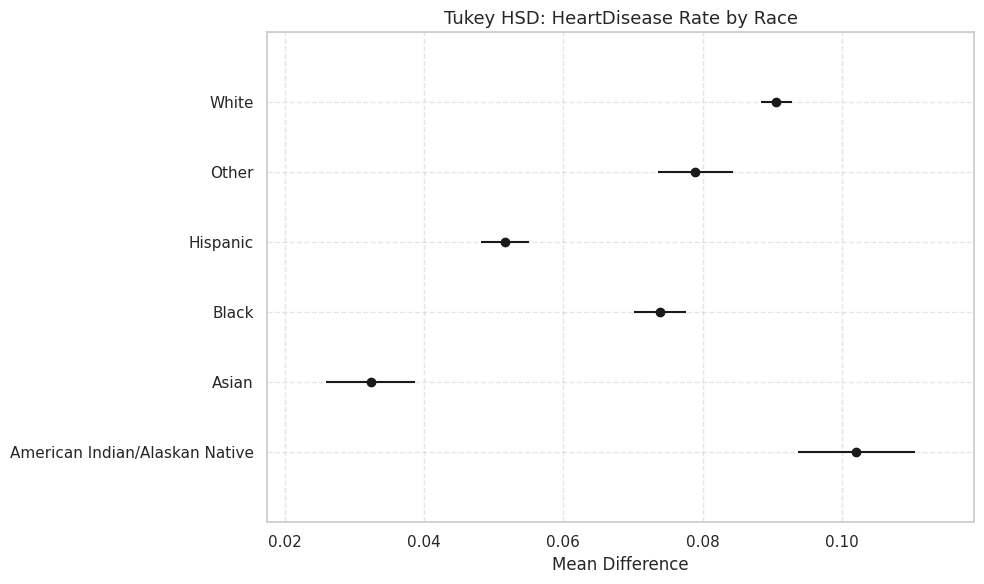

In [ ]:
# 사후 분석 시각화
tukey_result.plot_simultaneous(figsize=(10,6))
plt.title("Tukey HSD: HeartDisease Rate by Race", fontsize=13)
plt.xlabel("Mean Difference")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Race 재매핑: Black + Other → Black/Other
race_group_map = {
    'Black': 'Black/Other',
    'Other': 'Black/Other',
    'White': 'White',
    'Asian': 'Asian',
    'Hispanic': 'Hispanic',
    'American Indian/Alaskan Native': 'American Indian/Alaskan Native'
}

df['Race'] = df['Race'].map(race_group_map)

In [ ]:
from scipy.stats import chi2_contingency
contingency_race = pd.crosstab(df['Race'], df['HeartDisease'])
chi2, p, dof, expected_race = chi2_contingency(contingency_race)

print("=== Chi-Square Test for Race ===")
print(f"Chi2 Statistic: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

=== Chi-Square Test for Race ===
Chi2 Statistic: 830.1963
p-value: 0.0000
Degrees of Freedom: 4


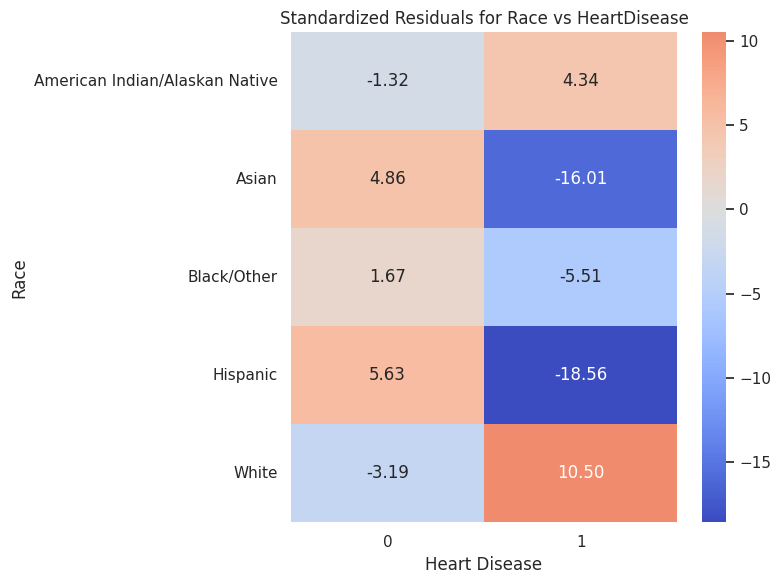

In [ ]:
observed_race = contingency_race.values
standardized_residuals_race = (observed_race - expected_race) / np.sqrt(expected_race)

resid_race_df = pd.DataFrame(
    standardized_residuals_race,
    index=contingency_race.index,
    columns=contingency_race.columns
)

plt.figure(figsize=(8, 6))
sns.heatmap(resid_race_df, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Standardized Residuals for Race vs HeartDisease')
plt.ylabel("Race")
plt.xlabel("Heart Disease")
plt.tight_layout()
plt.show()

#### 해석
---
```
카이제곱 독립성 검정을 통해 인종과 심장병 발생 여부 간의 독립성을 확인해 보니,
통계적으로 유의미한 결과가 나왔음.
(즉, 귀무가설 "인종과 심장병 여부는 독립이다"가 기각됨 즉 새롭게 매핑한 인종별 차이가 있음)

또한 White, American Indian/Alaskan Native 인종은 심장병 발생이 기대보다 높았고, 반대로 Asian, Hispanic 인종은 심장병 발생이 현저히 낮았음

이를 통해 인종과 심장병 간의 통계적 연관성(association)은 존재한다고 결론 지을 수 있음.

그러나 이 연관성이 인종 자체의 직접 영향인지, 혹은 인종별로 다른 생활습관·건강지표 때문인지는 이 단계에선 모름.

따라서 이러한 차이가 단순 유전적 때문인지, 다른 건강/생활습관 요인의 복합적인 결과인지 탐색 필요
```

In [ ]:
# Race에 따라 건강 관련 특성(생활습관, 동반 질환 등)이 유의하게 다른가?
# 시각화 진행 후에 의미있어보이는 변수들로 검정 실행

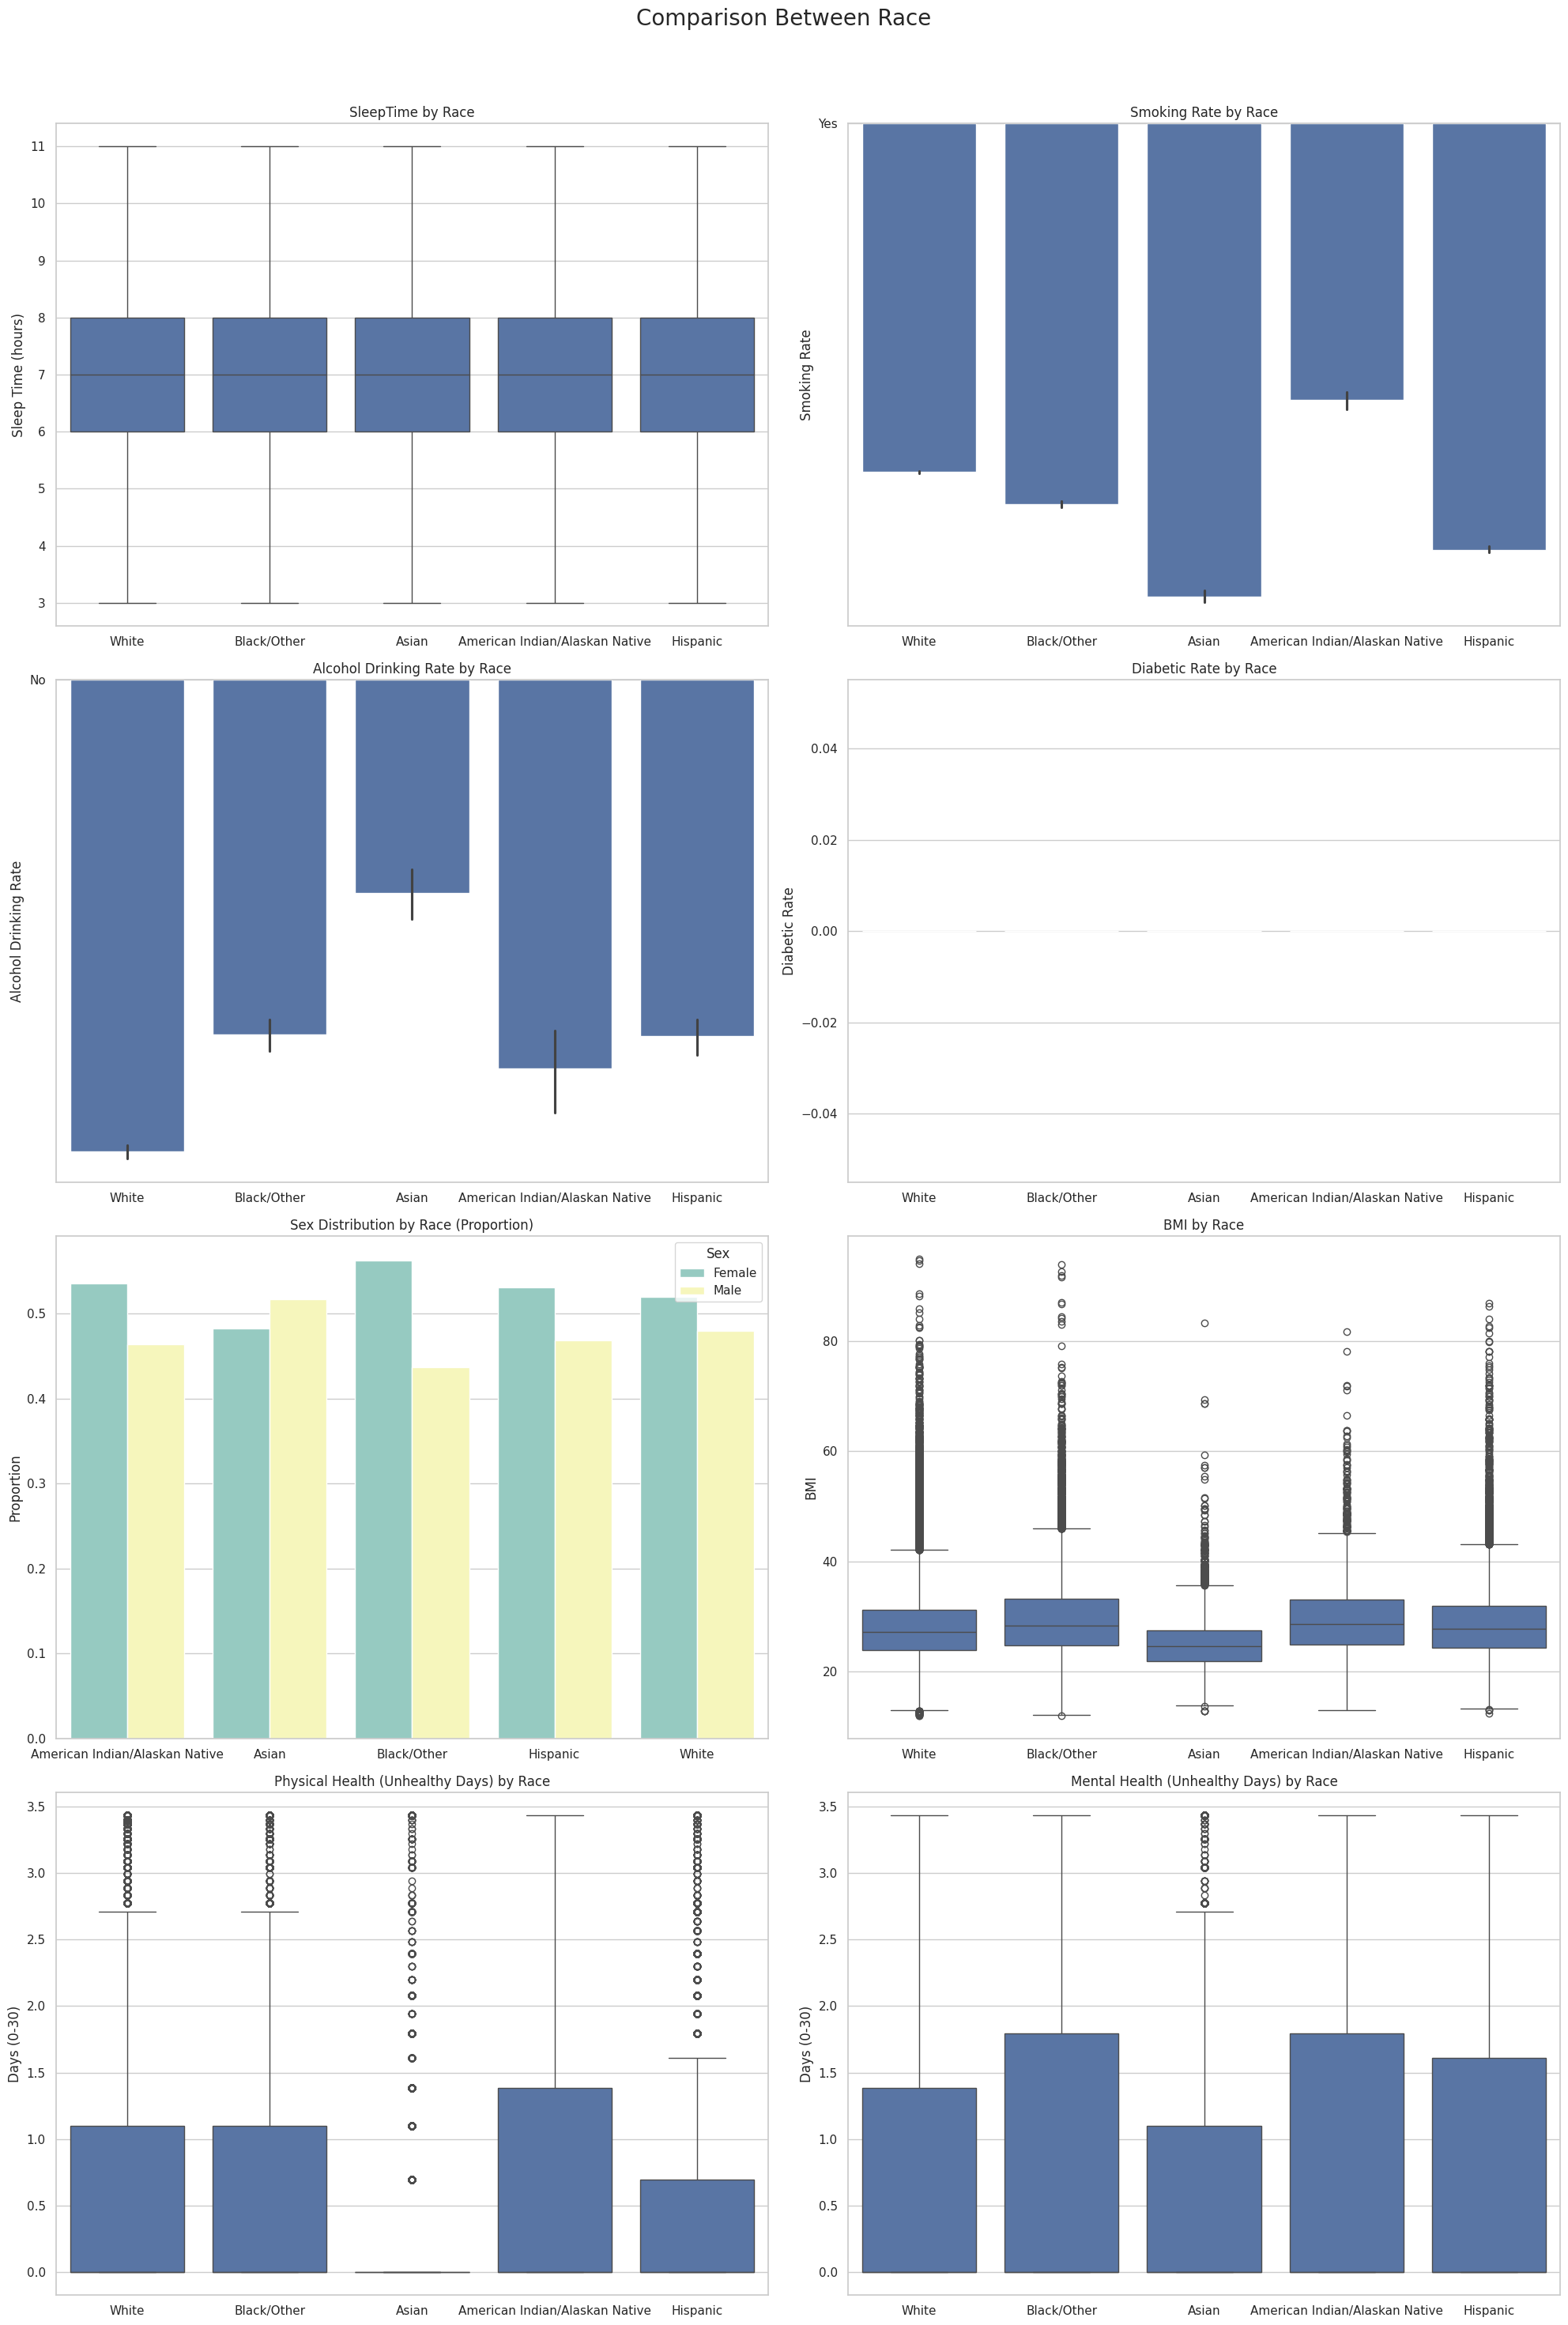

In [ ]:
# 비율 계산: 인종별 성별 비율
sex_prop = (
    df.groupby('Race')['Sex']
      .value_counts(normalize=True)
      .rename('Proportion')
      .reset_index()
)

fig, axs = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle("Comparison Between Race", fontsize=20)
sns.set_theme(style="whitegrid")
sns.set_palette("Set3")

# 1. SleepTime
sns.boxplot(data=df, x='Race', y='SleepTime', ax=axs[0, 0])
axs[0, 0].set_title("SleepTime by Race")
axs[0, 0].set_xlabel("")
axs[0, 0].set_ylabel("Sleep Time (hours)")

# 2. Smoking
sns.barplot(data=df, x='Race', y='Smoking', ax=axs[0, 1])
axs[0, 1].set_title("Smoking Rate by Race")
axs[0, 1].set_xlabel("")
axs[0, 1].set_ylabel("Smoking Rate")

# 3. AlcoholDrinking
sns.barplot(data=df, x='Race', y='AlcoholDrinking', ax=axs[1, 0])
axs[1, 0].set_title("Alcohol Drinking Rate by Race")
axs[1, 0].set_xlabel("")
axs[1, 0].set_ylabel("Alcohol Drinking Rate")

# 4. Diabetic
  # 'Diabetic_Binary' 컬럼 생성 (당뇨 진단된 경우 1, 나머지는 0)
df['Diabetic_Binary'] = df['Diabetic'].apply(lambda x: 1 if x==1 else 0)

sns.barplot(
    data=df,
    x='Race',
    y='Diabetic_Binary',
    ax=axs[1, 1],
    estimator='mean'
)
axs[1, 1].set_title("Diabetic Rate by Race")
axs[1, 1].set_xlabel("")
axs[1, 1].set_ylabel("Diabetic Rate")

# 5. Sex 비율
sns.barplot(data=sex_prop, x='Race', y='Proportion', hue='Sex', ax=axs[2, 0])
axs[2, 0].set_title("Sex Distribution by Race (Proportion)")
axs[2, 0].set_xlabel("")
axs[2, 0].set_ylabel("Proportion")
axs[2, 0].legend(title="Sex", loc='best')

# 6. BMI
sns.boxplot(data=df, x='Race', y='BMI', ax=axs[2, 1])
axs[2, 1].set_title("BMI by Race")
axs[2, 1].set_xlabel("")
axs[2, 1].set_ylabel("BMI")

# 7. PhysicalHealth
sns.boxplot(data=df, x='Race', y='PhysicalHealth', ax=axs[3, 0])
axs[3, 0].set_title("Physical Health (Unhealthy Days) by Race")
axs[3, 0].set_xlabel("")
axs[3, 0].set_ylabel("Days (0-30)")

# 8. MentalHealth
sns.boxplot(data=df, x='Race', y='MentalHealth', ax=axs[3, 1])
axs[3, 1].set_title("Mental Health (Unhealthy Days) by Race")
axs[3, 1].set_xlabel("")
axs[3, 1].set_ylabel("Days (0-30)")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### **시각화 결과 의미 있는 6개 및 통계 검정**
| 변수명 | 설명 | 시각상 차이 | 변수 타입 | 검정 방법 |
|--------|------|-------------|-----------|-----------|
| `Smoking` | 흡연 비율 | 뚜렷 | 이진형 (0/1) | ANOVA (또는 카이제곱) |
| `AlcoholDrinking` | 음주 비율 | 명확 | 이진형 | ANOVA |
| `Diabetic` | 당뇨 보유 비율 | 확실 | 이진형 | ANOVA |
| `BMI` | 체질량지수 | 차이 뚜렷 | 수치형 | ANOVA |
| `PhysicalHealth` | 신체적으로 건강하지 않은 날 수 | 차이 있음 | 수치형 | ANOVA |
| `MentalHealth` | 정신적으로 건강하지 않은 날 수 | 차이 있음 | 수치형 | ANOVA |

In [ ]:
anova_targets = ['Smoking', 'AlcoholDrinking', 'Diabetic_Binary', 'BMI', 'PhysicalHealth', 'MentalHealth']

for var in anova_targets:
    print(f"\n=== ANOVA: {var} by Race ===")
    model = ols(f'{var} ~ C(Race)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)


=== ANOVA: Smoking by Race ===
                sum_sq        df           F  PR(>F)
C(Race)     804.190556       4.0  839.239989     0.0
Residual  75520.311096  315247.0         NaN     NaN

=== ANOVA: AlcoholDrinking by Race ===
                sum_sq        df           F        PR(>F)
C(Race)      26.130187       4.0  102.933706  9.255117e-88
Residual  20006.718921  315247.0         NaN           NaN

=== ANOVA: Diabetic_Binary by Race ===
                sum_sq        df           F         PR(>F)
C(Race)     110.107759       4.0  250.926692  1.242052e-215
Residual  34582.949795  315247.0         NaN            NaN

=== ANOVA: BMI by Race ===
                sum_sq        df            F  PR(>F)
C(Race)   1.619253e+05       4.0  1022.234282     0.0
Residual  1.248404e+07  315247.0          NaN     NaN

=== ANOVA: PhysicalHealth by Race ===
                sum_sq        df           F         PR(>F)
C(Race)   3.886656e+04       4.0  158.135827  1.919319e-135
Residual  1.937032e+07 

In [ ]:
print("\n\n=== Tukey's HSD 사후 검정 ===")

for var in anova_targets:
    print(f"\n\n▶ {var} by Race")
    tukey = pairwise_tukeyhsd(endog=df[var], groups=df['Race'], alpha=0.05)
    print(tukey)



=== Tukey's HSD 사후 검정 ===


▶ Smoking by Race
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
            group1                group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------------------------------
American Indian/Alaskan Native       Asian  -0.3203   0.0 -0.3443 -0.2963   True
American Indian/Alaskan Native Black/Other  -0.1699   0.0 -0.1901 -0.1497   True
American Indian/Alaskan Native    Hispanic  -0.2442   0.0 -0.2646 -0.2237   True
American Indian/Alaskan Native       White  -0.1172   0.0 -0.1361 -0.0982   True
                         Asian Black/Other   0.1504   0.0  0.1338  0.1671   True
                         Asian    Hispanic   0.0762   0.0  0.0592  0.0932   True
                         Asian       White   0.2031   0.0  0.1879  0.2183   True
                   Black/Other    Hispanic  -0.0743   0.0 -0.0852 -0.0633   True
                   Black/Other       White   0.0527   0.0  0.

#### **결과 요약**
---

### 변수별 특징
```
1. Smoking:
   - 흡연율 높은 AI/AN과 White에서 심장병 비율도 높음 → 명확한 방향성 존재

2. Diabetic:
   - AI/AN이 가장 높고, Black/Other, Hispanic도 높은 편
   - Asian은 가장 낮은 당뇨 비율을 보임
   - 전체적으로 당뇨 비율이 높은 집단에서 심장병 비율도 높게 나타나는 경향

3. BMI:
   - AI/AN과 Black/Other의 BMI가 높음 → 심장병 위험과 부합
   - Asian은 BMI가 가장 낮음

4. AlcoholDrinking:
   - White가 가장 높은 음주율을 보이지만, 심장병 환자에서 음주율은 낮게 관찰됨
   - ↳ 진단 이후 습관 변경 가능성 or 교란 변수(나이, 동반질환 등) 고려 필요

5. Physical/Mental Health:
   - AI/AN이 가장 나쁘고 → 심장병과 강한 관련성
   - Asian은 두 지표 모두 좋음

```
---

### 인종별 한 줄 정리

```
1. Asian:  
   - 매우 낮은 흡연율, 낮은 BMI, 가장 좋은 Physical·Mental Health  
   - → 심장병 위험 요인이 전반적으로 적은 집단

2. American Indian/Alaskan Native (AI/AN):  
   - 가장 높은 흡연율, 높은 BMI, 가장 나쁜 정신·신체 건강  
   - 당뇨 비율도 전체 중 가장 높음  
   → **다수 위험 요인이 중첩**된 고위험 집단

3. Black/Other:  
   - 흡연·BMI·당뇨 모두 중간 이상, 음주율 낮음  
   - 정신·신체 건강 지표는 AI/AN보다는 낫지만 평균보다는 나쁨 → 잠재적 고위험군

4. Hispanic:  
   - 흡연율 낮고, BMI·당뇨·정신건강 지표 모두 평균 수준  
   - 전반적으로 위험 요인은 적당한 수준 → **중간 위험군**

5. White:  
   - 흡연율 높음, 음주율 가장 높음  
   - BMI는 중간 수준, 당뇨는 가장 낮은 편  
   → 생활습관 요인(흡연·음주)은 나쁘지만, 당뇨 측면에선 위험이 적은 이질적인 패턴

```

#### 해석
---
만약 인종 자체가 독립적 영향이라면, 생활습관·건강지표가 인종 간에 차이가 없어야 하지만,
실제 데이터를 시각화 및 사후검정으로 확인한 결과, 생활습관과 건강지표가 인종 간에 뚜렷한 차이를 보였음.

만약 인종이 심장병의 독립적 원인이라면,
위와 같은 위험인자 분포의 차이 없이도 발병률 차이가 나야 함.

그러나 실제론 위험요인의 조합이 다르기 때문에, 인종보다는 lifestyle risk factor가 직접 원인일 가능성이 높다고 판단됨


# 5.1) 변수 선정
기존 변수의 단편적인 정보가 아닌, 의미 있는 조합 변수를 통해 해석이 용이한 모델을 개발하고자 함.

## A) 단일 로지스틱 회귀

H₀ (귀무가설): 각 개별 변수의 계수(β)가 0이다.
→ "단일 변수만으로는 심장병 발병에 유의한 영향을 미치지 않는다."

H₁ (대립가설): 특정 변수의 계수(β)가 0이 아니다.
→ "예를 들어, Smoking_Yes는 심장병 발병 확률을 높인다(β > 0), 반면 어떤 변수는 오히려 낮출 수도 있다

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [ ]:
# 단일 변수 로지스틱 회귀 수행
results = []

for col in X_train.columns:
    X_single = sm.add_constant(X_train[[col]])
    model = sm.Logit(y_train, X_single)
    result = model.fit(disp=0)
    results.append({
        'variable': col,
        'coef': result.params[col],
        'pvalue': result.pvalues[col],
        'pseudo_r2': result.prsquared
    })

results_df = pd.DataFrame(results).sort_values(by='pseudo_r2', ascending=False)
print("단일 변수 로지스틱 회귀 결과:")
display(results_df)

단일 변수 로지스틱 회귀 결과:


,variable,coef,pvalue,pseudo_r2
3,AgeCategory,0.307581,0.000000e+00,0.108580
4,GenHealth,-0.792595,0.000000e+00,0.094684
10,DiffWalking_Yes,1.456541,0.000000e+00,0.051733
18,Diabetic_Yes,1.378484,0.000000e+00,0.043561
9,Stroke_Yes,1.950704,0.000000e+00,0.039749
1,PhysicalHealth,0.453401,0.000000e+00,0.037590
22,KidneyDisease_Yes,1.593022,0.000000e+00,0.023391
7,Smoking_Yes,0.758632,0.000000e+00,0.018994
20,PhysicalActivity_Yes,-0.721682,0.000000e+00,0.014397
23,SkinCancer_Yes,0.892374,0.000000e+00,0.012870


In [ ]:
# 양의 계수인 변수만 추출 (상호작용 후보)
positive_vars = results_df[results_df['coef'] > 0]['variable'].tolist()
print("심장병 발병 확률을 높이는 변수들:")
print(positive_vars)

심장병 발병 확률을 높이는 변수들:
['AgeCategory', 'DiffWalking_Yes', 'Diabetic_Yes', 'Stroke_Yes', 'PhysicalHealth', 'KidneyDisease_Yes', 'Smoking_Yes', 'SkinCancer_Yes', 'Sex_Male', 'BMI_Category', 'BMI', 'Race_White', 'Asthma_Yes', 'Diabetic_No, borderline diabetes', 'MentalHealth']


In [ ]:
# 음의 계수인 변수만 추출
negative_vars = results_df[results_df['coef'] < 0]['variable'].tolist()
print("심장병 발병 확률을 낮추는 변수들:")
print(negative_vars)

심장병 발병 확률을 낮추는 변수들:
['GenHealth', 'PhysicalActivity_Yes', 'Race_Hispanic', 'AlcoholDrinking_Yes', 'Race_Asian', 'Diabetic_Yes (during pregnancy)', 'Race_Black', 'SleepTime', 'Race_Other']


## B) 다중 로지스틱 회귀

H₀ (귀무가설): 선택된 상호작용 항의 계수(β_interaction)는 0이다.
→ "위험 변수들 간의 상호작용이 심장병 발병에 추가적인 영향을 주지 않는다."

H₁ (대립가설): 적어도 하나의 상호작용 항의 계수(β_interaction)는 0이 아니다.
→ "예를 들어, Smoking_Yes와 Diabetic_Yes의 상호작용이 단순 개별 효과 이상의 위험 상승 효과를 보인다."

### i) 심장병 발병률을 올리는 조합

In [ ]:
import itertools

# positive_vars에 해당하는 변수만 센터링
X_train_centered = X_train.copy()
for col in positive_vars:
    X_train_centered[col] = X_train_centered[col] - X_train_centered[col].mean()

X_train_inter = X_train_centered.copy()
for var1, var2 in itertools.combinations(positive_vars, 2):
    interaction_name = f"{var1}_x_{var2}"
    X_train_inter[interaction_name] = X_train_inter[var1] * X_train_centered[var2]

X_train_inter_const = sm.add_constant(X_train_inter)

model_inter_all = sm.Logit(y_train, X_train_inter_const).fit_regularized(
    method='l1',
    alpha=0.1,
    disp=0
)
print(model_inter_all.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 81 out of 130 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               252201
Model:                          Logit   Df Residuals:                   252071
Method:                           MLE   Df Model:                          129
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2291
Time:                        19:07:38   Log-Likelihood:                -56366.
converged:                      False   LL-Null:                       -73118.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9222   2.18e+04   -8.8e-05      1.000   -4.28e+04    4.28e+04
BMI  

In [ ]:
# Coef 기준 상호작용 항 상위 10개 출력

coefs = model_inter_all.params
pvals = model_inter_all.pvalues

interaction_terms = coefs[coefs.index.str.contains('_x_')]

top_10_interactions = interaction_terms.sort_values(ascending=False).head(10)

top_10_df = pd.DataFrame({
    'Interaction Term': top_10_interactions.index,
    'Coefficient': coefs[top_10_interactions.index],
    'P-Value': pvals[top_10_interactions.index]
}).reset_index(drop=True)

print("상호작용 항 상위 10개:")
display(top_10_df)

상호작용 항 상위 10개:


,Interaction Term,Coefficient,P-Value
0,Sex_Male_x_Race_White,0.309266,3.259224e-12
1,"Race_White_x_Diabetic_No, borderline diabetes",0.209368,7.558445e-02
2,"KidneyDisease_Yes_x_Diabetic_No, borderline di...",0.174742,2.961529e-01
3,Smoking_Yes_x_Race_White,0.162449,2.081102e-04
4,KidneyDisease_Yes_x_BMI,0.130985,6.281891e-02
5,DiffWalking_Yes_x_BMI_Category,0.122683,1.340292e-02
6,Diabetic_Yes_x_Race_White,0.116835,1.378159e-02
7,"SkinCancer_Yes_x_Diabetic_No, borderline diabetes",0.111970,3.900646e-01
8,DiffWalking_Yes_x_KidneyDisease_Yes,0.090172,1.445699e-01
9,SkinCancer_Yes_x_Sex_Male,0.089202,5.401451e-02


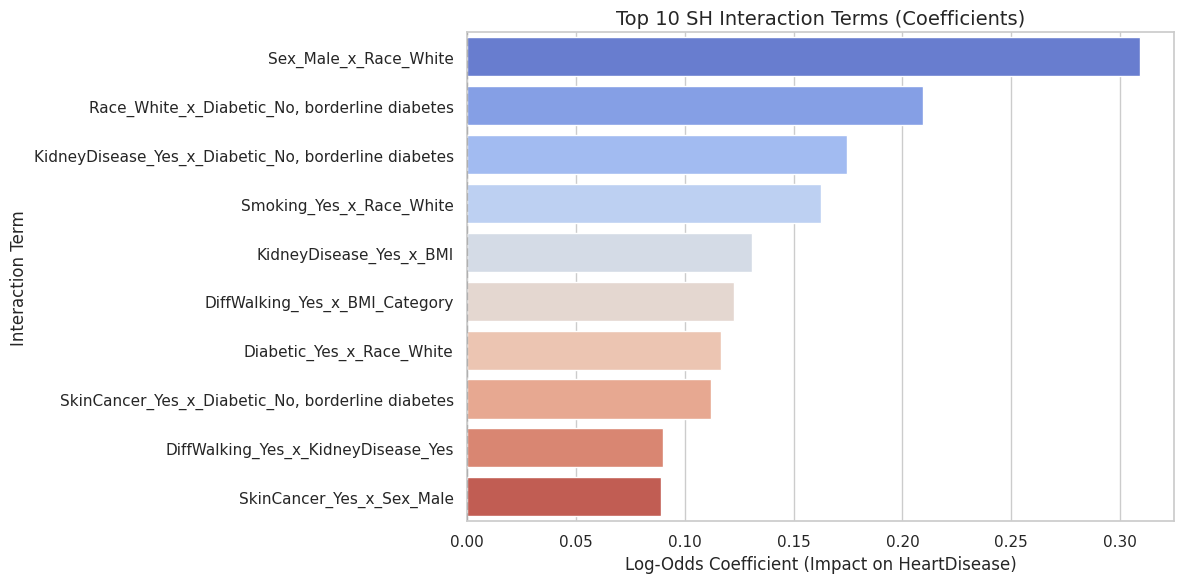

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_df,
    x='Coefficient',
    y='Interaction Term',
    palette='coolwarm'
)

plt.axvline(0, color='black', linestyle='--')
plt.title('Top 10 SH Interaction Terms (Coefficients)', fontsize=14)
plt.xlabel('Log-Odds Coefficient (Impact on HeartDisease)', fontsize=12)
plt.ylabel('Interaction Term', fontsize=12)
plt.tight_layout()
plt.show()

### ii) 심장병 발병률을 낮추는 조합

In [ ]:
# negative_vars에 해당하는 변수만 센터링
X_train_centered = X_train.copy()
for col in negative_vars:
    X_train_centered[col] = X_train_centered[col] - X_train_centered[col].mean()

X_train_inter = X_train_centered.copy()
for var1, var2 in itertools.combinations(negative_vars, 2):
    interaction_name = f"{var1}_x_{var2}"
    X_train_inter[interaction_name] = X_train_centered[var1] * X_train_centered[var2]

X_train_inter_const = sm.add_constant(X_train_inter)

model_inter_all = sm.Logit(y_train, X_train_inter_const).fit_regularized(
    method='l1', alpha=0.1, disp=0
)

print(model_inter_all.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 21 out of 61 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               252201
Model:                          Logit   Df Residuals:                   252140
Method:                           MLE   Df Model:                           60
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.2229
Time:                        19:08:33   Log-Likelihood:                -56822.
converged:                       True   LL-Null:                       -73118.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     -5.6094   2.78e+05  -2.02e-05      1.000   -5.44e+05    5.44e+05

In [ ]:
# Coef 기준 상호작용 항 상위 10개 출력

coefs = model_inter_all.params
pvals = model_inter_all.pvalues

interaction_terms = coefs[coefs.index.str.contains('_x_')]

top_10_interactions = interaction_terms.sort_values(ascending=True).head(10)

top_10_neg_df = pd.DataFrame({
    'Interaction Term': top_10_interactions.index,
    'Coefficient': coefs[top_10_interactions.index],
    'P-Value': pvals[top_10_interactions.index]
}).reset_index(drop=True)

print("상호작용 항 상위 10개:")
display(top_10_neg_df)

상호작용 항 상위 10개:


,Interaction Term,Coefficient,P-Value
0,AlcoholDrinking_Yes_x_Race_Asian,-0.813920,0.194081
1,AlcoholDrinking_Yes_x_Race_Black,-0.419233,0.057726
2,PhysicalActivity_Yes_x_Diabetic_Yes (during pr...,-0.213355,0.405718
3,PhysicalActivity_Yes_x_AlcoholDrinking_Yes,-0.204544,0.014077
4,PhysicalActivity_Yes_x_Race_Black,-0.136159,0.048153
5,Race_Black_x_Race_Other,-0.107093,1.000000
6,PhysicalActivity_Yes_x_Race_Asian,-0.091517,0.596919
7,GenHealth_x_PhysicalActivity_Yes,-0.068009,0.000045
8,PhysicalActivity_Yes_x_Race_Other,-0.067899,0.492771
9,SleepTime_x_Race_Other,-0.051648,0.166409


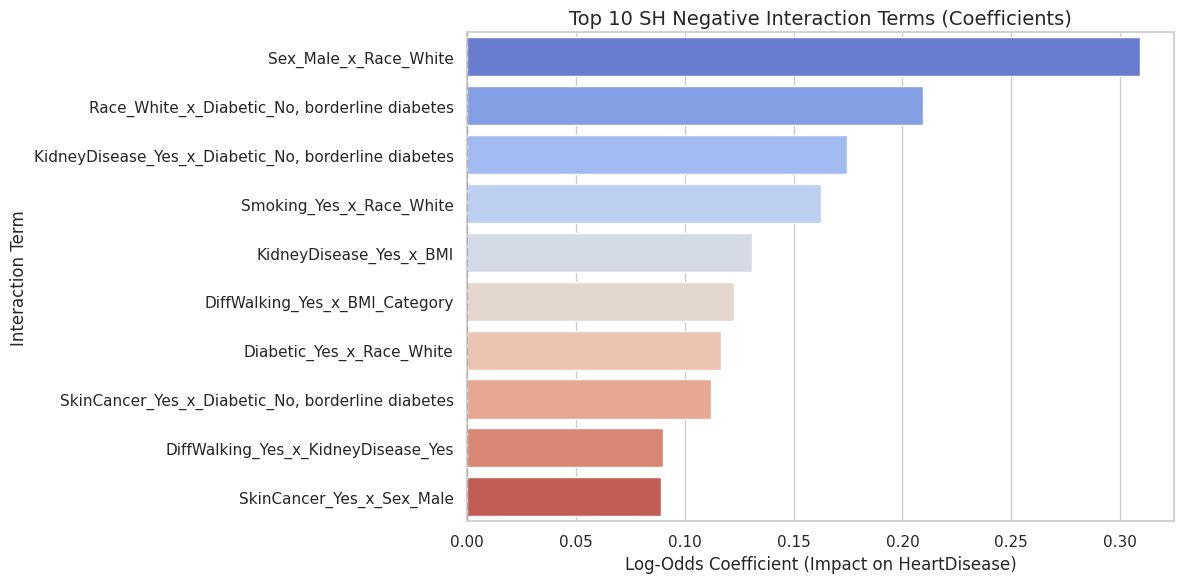

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_df,
    x='Coefficient',
    y='Interaction Term',
    palette='coolwarm'
)

plt.axvline(0, color='black', linestyle='--')
plt.title('Top 10 SH Negative Interaction Terms (Coefficients)', fontsize=14)
plt.xlabel('Log-Odds Coefficient (Impact on HeartDisease)', fontsize=12)
plt.ylabel('Interaction Term', fontsize=12)
plt.tight_layout()
plt.show()

### iii) 유의한 조합 필터링 및 확률 변환

In [ ]:
# odds Ratio -> 확률 변화 함수
def or_to_prob_change(base_prob, or_value):
    base_odds = base_prob / (1 - base_prob)
    new_odds = base_odds * or_value
    new_prob = new_odds / (1 + new_odds)
    diff_percent = round((new_prob - base_prob) * 100, 2)
    return f"+{diff_percent}%p" if diff_percent >= 0 else f"{diff_percent}%p"

In [ ]:
from IPython.display import display

logit_pos_df = top_10_df[top_10_df["P-Value"] < 0.05].copy()
logit_neg_df = top_10_neg_df[top_10_neg_df["P-Value"] < 0.05].copy()

logit_df = pd.concat([logit_pos_df, logit_neg_df]).reset_index(drop=True)

base_prob = 0.20
logit_df["Odds Ratio (e^β)"] = np.exp(logit_df["Coefficient"])
logit_df["Odds 변화 (%)"] = round((logit_df["Odds Ratio (e^β)"] - 1) * 100, 1)
logit_df["확률 변화"] = logit_df["Odds Ratio (e^β)"].apply(lambda orr: or_to_prob_change(base_prob, orr))

logit_df = logit_df[[
    "Interaction Term", "Coefficient", "P-Value",
    "Odds Ratio (e^β)", "Odds 변화 (%)", "확률 변화"
]]
display(logit_df)

,Interaction Term,Coefficient,P-Value,Odds Ratio (e^β),Odds 변화 (%),확률 변화
0,Sex_Male_x_Race_White,0.309266,3.259224e-12,1.362425,36.2,+5.41%p
1,Smoking_Yes_x_Race_White,0.162449,2.081102e-04,1.176389,17.6,+2.73%p
2,DiffWalking_Yes_x_BMI_Category,0.122683,1.340292e-02,1.130526,13.1,+2.04%p
3,Diabetic_Yes_x_Race_White,0.116835,1.378159e-02,1.123934,12.4,+1.93%p
4,PhysicalActivity_Yes_x_AlcoholDrinking_Yes,-0.204544,1.407717e-02,0.815019,-18.5,-3.07%p
5,PhysicalActivity_Yes_x_Race_Black,-0.136159,4.815272e-02,0.872704,-12.7,-2.09%p
6,GenHealth_x_PhysicalActivity_Yes,-0.068009,4.468792e-05,0.934252,-6.6,-1.07%p


## C) 해석
---

### 1. 심장병 위험을 높이는 상호작용 조합 (Log-Odds > 0)

| 조합 | 의미 | Odds 증가율 | 확률 변화 |
|------|------|--------------|------------|
| Sex_Male x Race_White | 백인 남성 | +36.2% | +5.41%p |
| Smoking_Yes x Race_White | 백인 흡연자 | +17.6% | +2.73%p |
| DiffWalking_Yes x BMI_Category | 보행 어려움 + 높은 BMI | +13.1% | +2.04%p |
| Diabetic_Yes x Race_White | 백인 당뇨병 환자 | +12.4% | +1.93%p |

→ 백인 남성, 고위험 생활습관 (흡연, 당뇨, 보행장애 등) 조합이 위험을 크게 증가시킴

---

### 2. 심장병 위험을 낮추는 상호작용 조합 (Log-Odds < 0)

| 조합 | 의미 | Odds 감소율 | 확률 변화 |
|------|------|--------------|------------|
| PhysicalActivity_Yes x AlcoholDrinking_Yes | 음주하더라도 활동적인 경우 | -18.5% | -3.07%p |
| PhysicalActivity_Yes x Race_Black | 흑인 + 활동적 | -12.7% | -2.09%p |
| GenHealth x PhysicalActivity_Yes | 건강 상태가 좋고 활동적인 경우 | -6.6% | -1.07%p |

→ 신체활동이 다른 위험 요소(음주, 인종 등)를 상쇄하는 보호 효과를 보임

---

- 위험을 높이는 조합은 대부분 백인 남성 + 흡연/당뇨/고BMI/보행불편
- 위험을 낮추는 조합은 대부분 신체 활동성과 연관된 보호 효과  
    → "신체 활동 여부"가 보호 효과에서 핵심적인 변수라는 점이 특히 중요

# 5.2) 피쳐 엔지니어링

## A) 종합건강변수(Health Score)
---
BMI: 비만도 → 질병 위험도

PhysicalHealth: 신체적 건강 나쁠수록 위험 ↑

MentalHealth: 정신적 건강 나쁠수록 위험 ↑

SleepTime: 이상적인 7~8시간 벗어나면 건강악화

GenHealth: 주관적 건강 상태


In [ ]:
from scipy.optimize import minimize
from scipy.stats import pearsonr
from sklearn.metrics import f1_score,accuracy_score, roc_curve, precision_recall_curve, auc,confusion_matrix, classification_report, recall_score, precision_score
from sklearn.metrics import roc_auc_score

In [ ]:
df['HealthScore'] = (
    - np.log1p(df['BMI']) * (1 + (df['BMI'] > 30) * 0.5)
    - np.sqrt(df['PhysicalHealth']) * (1 + (df['PhysicalHealth'] > 15) * 0.2)
    - np.sqrt(df['MentalHealth']) * (1 + (df['MentalHealth'] > 15) * 0.2)
    - np.abs(df['SleepTime'] - 7)**1.5 * (1 + (np.abs(df['SleepTime'] - 7) > 3) * 0.3)
    + ((df['GenHealth'] + 1)**2) * 1.5
)

score = -df['HealthScore']
y = df['HeartDisease']

# 최적 threshold 계산 (Youden's J = tpr - fpr 최대화)
fpr, tpr, thresholds = roc_curve(y, score)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"최적 Threshold: {-optimal_threshold:.3f}")

최적 Threshold: 10.542


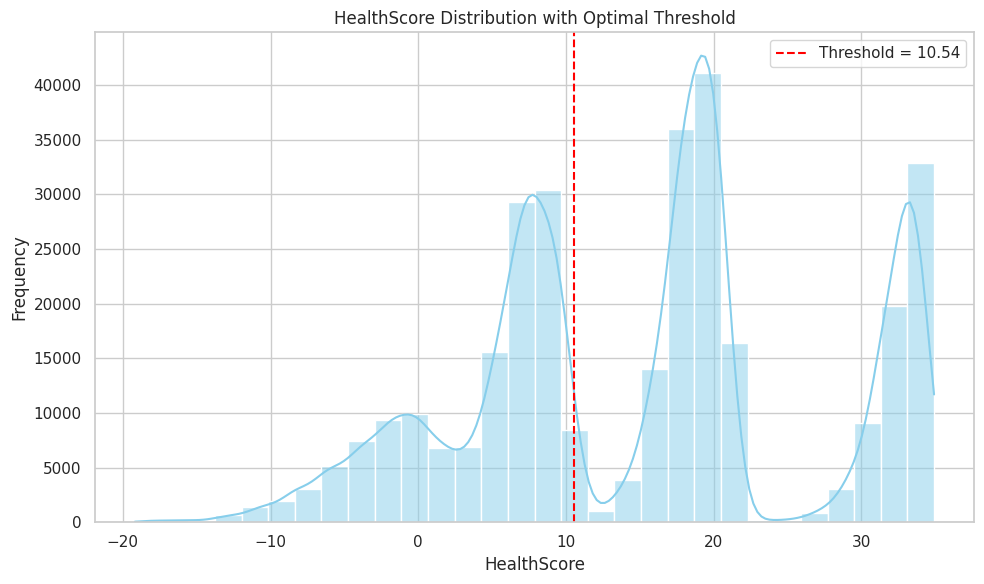

In [ ]:
df['Health_Flag'] = (df['HealthScore'] <= -optimal_threshold).astype(int)

plt.figure(figsize=(10, 6))
sns.histplot(df['HealthScore'], kde=True, bins=30, color='skyblue')
plt.axvline(x=-optimal_threshold, color='red', linestyle='--', label=f'Threshold = {-optimal_threshold:.2f}')
plt.title("HealthScore Distribution with Optimal Threshold")
plt.xlabel("HealthScore")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y, df['Health_Flag']))

print("\nClassification Report:")
print(classification_report(y, df['Health_Flag']))

Confusion Matrix:
[[172036 116615]
 [  6757  19844]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.60      0.74    288651
           1       0.15      0.75      0.24     26601

    accuracy                           0.61    315252
   macro avg       0.55      0.67      0.49    315252
weighted avg       0.89      0.61      0.69    315252



## B) 고위험군(HighRiskScore)
단일 변수보다 **특정 위험 요인들의 결합**이 심장병 발생에 큰 영향을 준다는 분석 결과

→ 로지스틱 회귀 기반 상호작용 분석 결과를 바탕으로,  
심장병 발생과 밀접하게 연관된 위험 변수 조합과  
연령에 따른 위험도(AgeScore)를 함께 반영한 연속형 위험 지표.



In [ ]:
# 상호작용 기반 위험 변수 생성
df['R1_MaleWhite']       = df['Sex_Male'] * df['Race_White']
df['R2_SmokingWhite']    = df['Smoking_Yes'] * df['Race_White']
df['R3_BMIDifWalk']      = ((df['BMI_Category'] >= 3).astype(int)) * df['DiffWalking_Yes']
df['R4_DiabeticWhite']   = df['Diabetic_Yes'] * df['Race_White']

# 연령 기반 위험 점수 유지
age_risk = df.groupby('AgeCategory')['HeartDisease'].mean()
base_risk = age_risk.iloc[0]
age_weights = age_risk / base_risk
df['AgeScore'] = df['AgeCategory'].map(age_weights)

# 최종 위험 변수 조합
X_risk = df[['R1_MaleWhite', 'R2_SmokingWhite', 'R3_BMIDifWalk', 'R4_DiabeticWhite', 'AgeScore']].astype(float)
y = df['HeartDisease']

In [ ]:
# AUC 기반 최적 가중치 계산
from scipy.optimize import minimize
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report

or_init = np.array([1.36, 1.17, 1.13, 1.12, 1.0])
or_init /= or_init.sum()

def neg_auc(weights):
    score = np.dot(X_risk, weights)
    return -roc_auc_score(y, score)

result = minimize(neg_auc, or_init, bounds=[(0, 5.0)] * X_risk.shape[1], method='L-BFGS-B')
best_weights = result.x

In [ ]:
# 위험 점수 및 플래그 정의
df['HighRiskScore'] = np.dot(X_risk, best_weights)
df['HighRiskScore'] = df['HighRiskScore'].astype(float)

from sklearn.metrics import roc_curve, confusion_matrix, classification_report

fpr, tpr, thresholds = roc_curve(y, df['HighRiskScore'])
optimal_threshold = thresholds[np.argmax(tpr - fpr)]
df['HighRiskFlag'] = (df['HighRiskScore'] >= optimal_threshold).astype(int)

print(f"가중치: {best_weights}")
print(f"최적 threshold: {optimal_threshold:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y, df['HighRiskFlag']))
print("\nClassification Report:\n", classification_report(y, df['HighRiskFlag']))

가중치: [0.23529412 0.20242215 0.19550173 0.19377163 0.17301038]
최적 threshold: 2.3670
Confusion Matrix:
 [[161676 126975]
 [  4365  22236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.56      0.71    288651
           1       0.15      0.84      0.25     26601

    accuracy                           0.58    315252
   macro avg       0.56      0.70      0.48    315252
weighted avg       0.90      0.58      0.67    315252



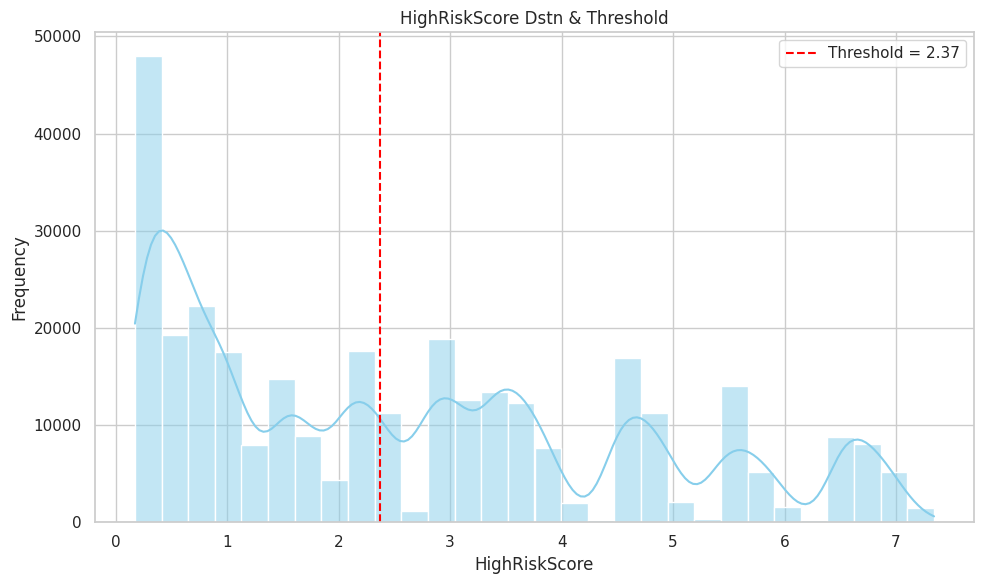

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['HighRiskScore'], bins=30, kde=True, color='skyblue')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Threshold = {optimal_threshold:.2f}')
plt.title("HighRiskScore Dstn & Threshold")
plt.xlabel("HighRiskScore")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

## C) ProtectScore

심장병 발생 위험을 낮추는 조합(보호 요인) + 건강한 수면 습관(SleepTime ≈ 7) 을 활용해,비선형적 보호 효과를 반영한 점수.

In [ ]:
# 상호작용 변수 생성 (로지스틱 회귀에서 보호 효과가 있었던 조합)
df['P1_ActiveDrinker'] = df['PhysicalActivity_Yes'] * df['AlcoholDrinking_Yes']
df['P2_BlackActive'] = df['PhysicalActivity_Yes'] * df['Race_Black']
df['P3_GenHealthActive'] = df['PhysicalActivity_Yes'] * df['GenHealth']

def sleep_effect(sleep, sigma=1.0):
    return np.exp(-((sleep - 7) ** 2) / (2 * sigma**2))

In [ ]:
# ProtectScore 정의 (비선형 결합)
def calc_protect_score(w, df, sigma=1.0):
    term1 = w[0] * np.log1p(df['P1_ActiveDrinker'])
    term2 = w[1] * np.log1p(df['P2_BlackActive'])
    term3 = w[2] * np.log1p(df['P3_GenHealthActive'])
    term4 = w[3] * sleep_effect(df['SleepTime'], sigma=sigma)
    bias  = w[4]
    return term1 + term2 + term3 + term4 + bias

# 최적화 목적 함수 (ProtectScore가 높을수록 건강 → y=1이 낮아야 함)
def neg_auc_protect(w, df, y, sigma=1.0):
    score = calc_protect_score(w, df, sigma)
    return -roc_auc_score(y, -score)

In [ ]:
# 초기 가중치 (로지스틱 회귀 계수 기반 가정 + sleep term 추가)
init_weights = np.array([1.2, 1.0, 1.5, 1.0, 0.0])

y = df['HeartDisease']
result = minimize(neg_auc_protect, init_weights, args=(df, y, 1.0),
                  bounds=[(0,5)]*4 + [(-5,5)],
                  method='L-BFGS-B')
best_weights = result.x
print("Best Protect Weights:", best_weights)

Best Protect Weights: [1.2 1.  1.5 1.  0. ]


In [ ]:
# 최종 점수 및 분류
df['ProtectScore'] = calc_protect_score(best_weights, df, sigma=1.0)
fpr, tpr, thresholds = roc_curve(y, -df['ProtectScore'])
opt_idx = np.argmax(tpr - fpr)
opt_thresh = thresholds[opt_idx]
df['LowProtectFlag'] = (df['ProtectScore'] <= -opt_thresh).astype(int)

print(f"최적 threshold: {opt_thresh:.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y, df['LowProtectFlag']))
print("\nClassification Report:\n", classification_report(y, df['LowProtectFlag']))

최적 threshold: -2.3529

Confusion Matrix:
 [[166176 122475]
 [  7379  19222]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72    288651
           1       0.14      0.72      0.23     26601

    accuracy                           0.59    315252
   macro avg       0.55      0.65      0.47    315252
weighted avg       0.89      0.59      0.68    315252



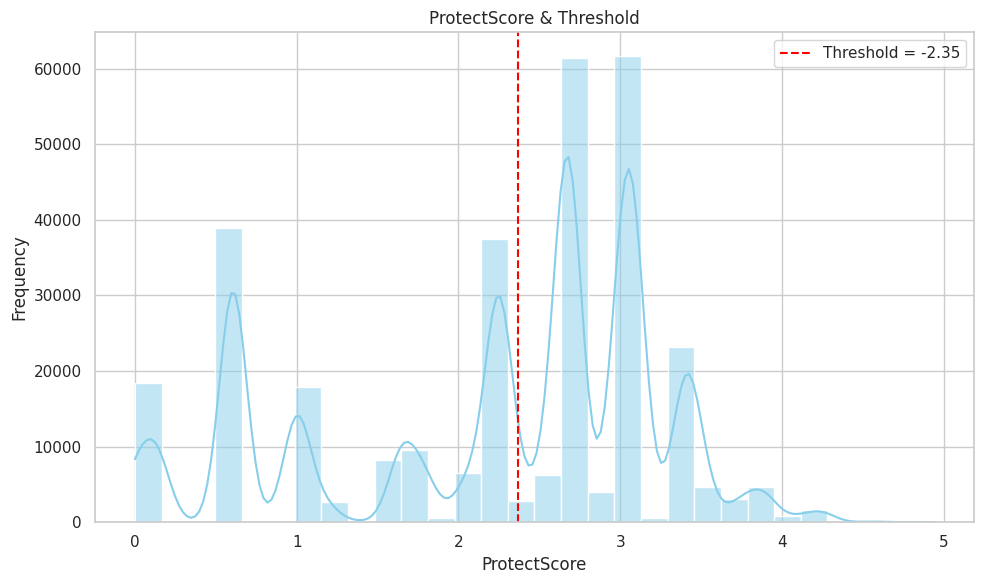

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['ProtectScore'], bins=30, kde=True, color='skyblue')
plt.axvline(optimal_threshold, color='red', linestyle='--', label=f'Threshold = {opt_thresh:.2f}')
plt.title("ProtectScore & Threshold")
plt.xlabel("ProtectScore")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

### i) 교차표(LowRisk - HighRisk)

|   L  /  H  | 0(위험 낮음) | 1(위험 높음) |
|-----------|--------------|--------------|
|0(보호요인 O) |   안정 집단   |잠재 개입 필요|
|1(보호요인 X) |  잠재적 위험 |   1차 타겟   |


In [ ]:
cross1 = pd.crosstab(df['LowProtectFlag'], df['Health_Flag'],
                     rownames=['LowProtectFlag (보호 부족)'],
                     colnames=['Health_Flag (기존 위험군)'],
                     margins=True,
                     margins_name='Total')
print("교차표 1: LowProtectFlag vs Health_Flag")
display(cross1)

교차표 1: LowProtectFlag vs Health_Flag


Health_Flag (기존 위험군),0,1,Total
LowProtectFlag (보호 부족),,,
0,145079,28476,173555
1,33714,107983,141697
Total,178793,136459,315252


In [ ]:
cross2 = pd.crosstab(df['LowProtectFlag'], df['HighRiskFlag'],
                     rownames=['LowProtectFlag (보호 부족)'],
                     colnames=['HighRiskFlag (상호작용 기반)'],
                     margins_name='Total')
print("교차표 2: LowProtectFlag vs HighRiskFlag")
display(cross2)

교차표 2: LowProtectFlag vs HighRiskFlag


HighRiskFlag (상호작용 기반),0,1
LowProtectFlag (보호 부족),,
0,102405,71150
1,63636,78061


## D) RiskGroup6
 **"위험요인 개수 + 보호 여부"** 기준으로 총 6개의 조합 생성

| 위험요인 개수 (`Health_Flag` + `HighRiskFlag`) | 보호 여부 (`LowProtectFlag`) | 그룹 이름 |
|----------------------------------------------------|-----------------------------|------------|
| 0개 | 보호 없음 | `NoRisk_Unprotected` |
| 0개 | 보호 있음 | `NoRisk_Protected` |
| 1개 | 보호 없음 | `OneRisk_Unprotected` |
| 1개 | 보호 있음 | `OneRisk_Protected` |
| 2개 | 보호 없음 | `TwoRisk_Unprotected` |
| 2개 | 보호 있음 | `TwoRisk_Protected` |


In [ ]:
def classify_risk_group6(row):
    risk_sum = row['Health_Flag'] + row['HighRiskFlag']
    protect = row['LowProtectFlag']

    if risk_sum == 0:
        return "NoRisk_Unprotected" if protect == 1 else "NoRisk_Protected"
    elif risk_sum == 1:
        return "OneRisk_Unprotected" if protect == 1 else "OneRisk_Protected"
    elif risk_sum == 2:
        return "TwoRisk_Unprotected" if protect == 1 else "TwoRisk_Protected"

df['RiskGroup6'] = df.apply(classify_risk_group6, axis=1)

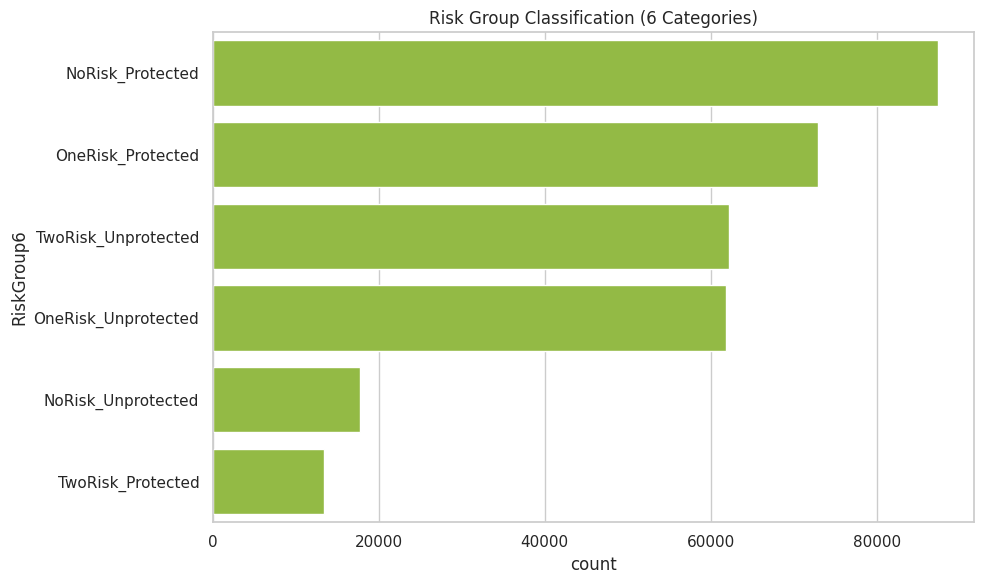

,HeartDisease
RiskGroup6,
TwoRisk_Unprotected,0.234892
TwoRisk_Protected,0.152931
OneRisk_Unprotected,0.070094
OneRisk_Protected,0.061332
NoRisk_Unprotected,0.016697
NoRisk_Protected,0.009897


In [ ]:
# 심장병 발병률 비교
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='RiskGroup6', order=df['RiskGroup6'].value_counts().index, color='yellowgreen')
plt.title("Risk Group Classification (6 Categories)")
plt.tight_layout()
plt.show()
df.groupby('RiskGroup6')['HeartDisease'].mean().sort_values(ascending=False)

### i) 해석
---


| 그룹 이름              | 발병률 | 해석 요약 |
|------------------------|--------|-----------|
| TwoRisk_Unprotected | 23.5%  | 가장 위험한 그룹 – 위험 요인 2개, 보호도 없음 |
| TwoRisk_Protected   | 15.3%  | 위험은 많지만 보호 요인이 있는 경우 – 완충 효과 |
| OneRisk_Unprotected | 7.0%   | 위험 요인 1개, 보호 없음 – 중간 수준의 위험 |
| OneRisk_Protected   | 6.1%   | 위험은 있지만 보호 요인도 있는 균형 상태
| NoRisk_Unprotected  | 1.7%   | 위험 요인은 없지만 보호도 없음 – 잠재적 노출군 |
| NoRisk_Protected    | 1.0%   | 가장 안전한 그룹 – 위험 요인도 없고 보호 있음 |


### ii) 인코딩
단순히 ordinal하게 인코딩하면 vif가 inf나오는 문제가 생김

각 클래스의 빈도 * 발병률을 가중치로 설정하는 방식

In [ ]:
total_n = len(df)

riskgroup_stats = df.groupby('RiskGroup6').agg(
    group_n=('RiskGroup6', 'count'),
    heart_rate=('HeartDisease', 'mean')
).reset_index()

riskgroup_stats['freq_ratio'] = riskgroup_stats['group_n'] / total_n

riskgroup_stats['group_weight'] = riskgroup_stats['heart_rate'] * riskgroup_stats['freq_ratio']

riskgroup_weight_map = dict(zip(riskgroup_stats['RiskGroup6'], riskgroup_stats['group_weight']))

df['RiskGroup6'] = df['RiskGroup6'].map(riskgroup_weight_map)

In [ ]:
df['RiskGroup6'] = np.log1p(df['RiskGroup6'] * 1000)

In [ ]:
df['RiskGroup6'].describe()

,RiskGroup6
count,315252.000000
mean,2.404232
std,0.978834
min,0.663772
25%,1.319263
50%,2.690229
75%,2.719922
max,3.856432


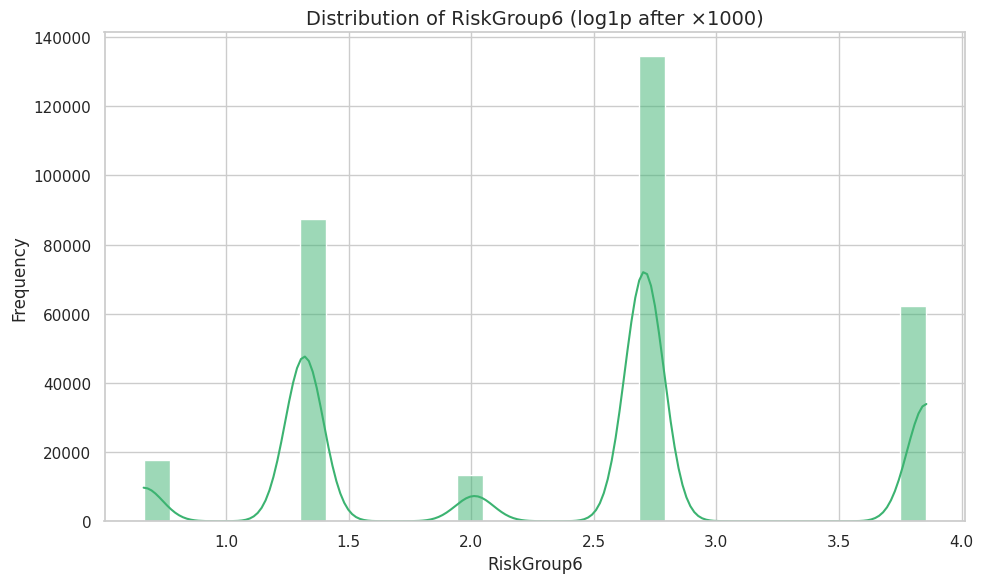

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['RiskGroup6'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribution of RiskGroup6 (log1p after ×1000)", fontsize=14)
plt.xlabel("RiskGroup6", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

## E) 질병 요약 변수
심장병과 관련된 **복수의 질병 병력**이 존재할 때, 그 위험성을 하나의 수치형 변수로 요약하고자 함.

Stroke, Diabetic, Asthma, KidneyDisease, SkinCancer 변수별로 해당 질병이 있을 때 심장병 발병률(가중치)로 총 위험 점수 산출.


In [ ]:
disease_vars = ['Stroke_Yes', 'Diabetic_Yes', 'Asthma_Yes', 'KidneyDisease_Yes', 'SkinCancer_Yes']

# 각 질병별 심장병 발생률 계산 (가중치)
weights = {}
for var in disease_vars:
    weights[var] = df[df[var] == 1]['HeartDisease'].mean()

df['DiseaseWeightScore'] = np.log1p(
    sum(df[var] * (100 * weights[var]) for var in disease_vars)
)
print("질병별 심장병 발생률 (가중치)")
for k, v in weights.items():
    print(f"{k}: {v}")

질병별 심장병 발생률 (가중치)
Stroke_Yes: 0.35820251854407453
Diabetic_Yes: 0.21735953640715547
Asthma_Yes: 0.11259160559626916
KidneyDisease_Yes: 0.29051799824407376
SkinCancer_Yes: 0.16532299214205531


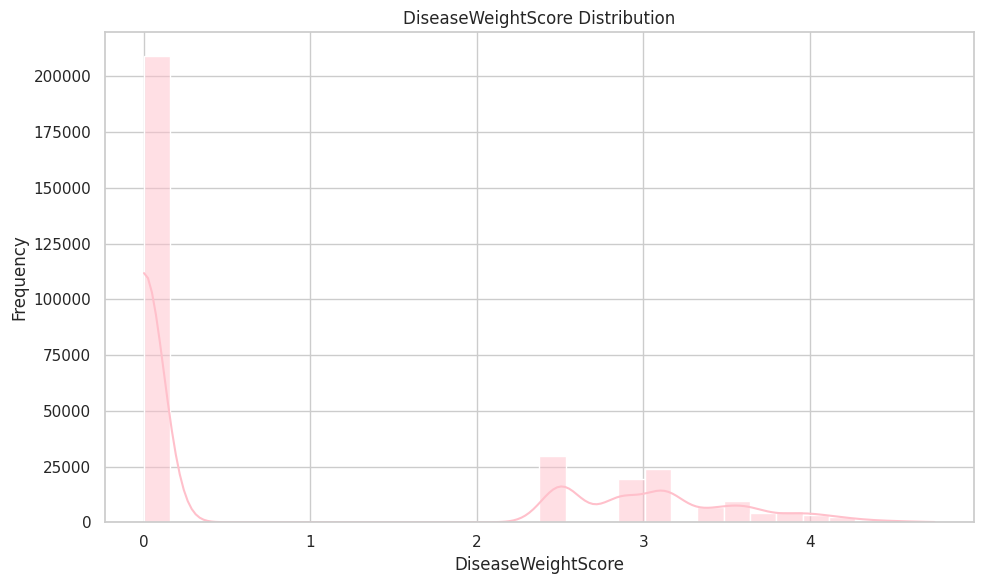

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DiseaseWeightScore'], bins=30, kde=True, color='pink')
plt.title("DiseaseWeightScore Distribution")
plt.xlabel("DiseaseWeightScore")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
df['DiseaseWeightScore'].describe()

,DiseaseWeightScore
count,315252.000000
mean,1.037351
std,1.487898
min,0.000000
25%,0.000000
50%,0.000000
75%,2.506273
max,4.748400


# 5.3) VIF 확인 및 기존 변수 삭제
유지할 변수 목록
- HeartDisease (target)
- 점수형 요약 변수
    - HighRiskScore
    - ProtectScore
    - HealthScore
    - DiseaseWeightScore
- 위험/보호 플래그
    - Health_Flag
    - LowProtectFlag
    - HighRiskFlag
- 위험 그룹화
    - RiskGroup6 (해석 목적)


In [ ]:
# 모든 컬럼에 대한 VIF 계산(타겟값 제외)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

target_col = 'HeartDisease'
vif_cols = df.select_dtypes(include=[np.number]).drop(columns=target_col)
vif_cols = add_constant(vif_cols)

vif_df = pd.DataFrame()
vif_df['Variable'] = vif_cols.columns
vif_df['VIF'] = [variance_inflation_factor(vif_cols.values, i) for i in range(vif_cols.shape[1])]

vif_df = vif_df.sort_values(by='VIF', ascending=False)
print(vif_df)

              Variable         VIF
0                const  220.197242
11            AgeScore  137.976242
12       HighRiskScore  137.114061
8          HealthScore   26.485455
5            GenHealth   26.272690
4          AgeCategory   10.780239
7         BMI_Category    9.800412
14  P3_GenHealthActive    9.643668
1                  BMI    9.609510
15        ProtectScore    8.816792
17          RiskGroup6    6.592000
13        HighRiskFlag    6.122562
9          Health_Flag    5.531870
16      LowProtectFlag    3.935065
2       PhysicalHealth    1.464561
10       R3_BMIDifWalk    1.380160
3         MentalHealth    1.333362
18  DiseaseWeightScore    1.228623
6            SleepTime    1.059511


In [ ]:
selected_cols = [
    # 타겟 + 주요 점수 및 플래그
    'HeartDisease',
    'HighRiskScore', 'Health_Flag',
    'ProtectScore', 'LowProtectFlag',
    'HealthScore', 'HighRiskFlag',
    'DiseaseWeightScore', 'RiskGroup6'
    ]
df1 = df[selected_cols].copy()

In [ ]:
df1.head()

,HeartDisease,HighRiskScore,Health_Flag,ProtectScore,LowProtectFlag,HealthScore,HighRiskFlag,DiseaseWeightScore,RiskGroup6
0,0,2.510339,0,2.215413,1,15.273162,1,3.922516,2.690229
1,0,6.513735,0,3.080078,0,20.939417,1,3.606048,2.719922
2,0,4.073374,1,1.646570,1,-1.915049,1,3.526217,3.856432
3,0,5.430254,1,0.606531,1,9.272759,1,2.864045,3.856432
4,0,0.656712,0,2.686609,0,17.957773,0,0.000000,1.319263


In [ ]:
target_col = 'HeartDisease'
vif_cols2 = df1.select_dtypes(include=[np.number]).drop(columns=target_col)
vif_cols2 = add_constant(vif_cols2)

vif_df2 = pd.DataFrame()
vif_df2['Variable'] =vif_cols2.columns
vif_df2['VIF'] = [variance_inflation_factor(vif_cols2.values, i) for i in range((vif_cols2).shape[1])]

vif_df2 = vif_df2.sort_values(by='VIF', ascending=False)
print(vif_df2)

             Variable        VIF
0               const  46.820688
8          RiskGroup6   6.088096
6        HighRiskFlag   5.853398
2         Health_Flag   5.031699
5         HealthScore   3.989729
4      LowProtectFlag   3.851917
1       HighRiskScore   3.760487
3        ProtectScore   3.430522
7  DiseaseWeightScore   1.184728


# 5.4) 스케일링 + SMOTEENN
- 스케일링: 기초 전처리 단계에서 이상치 처리 완료, Standard Scaler 사용
- SMOTEENN: 클래스 불균형 데이터. 소수 클래스 경계 강화 + 다수 클래스 노이즈 제거를 위해 시행

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN
from collections import Counter

In [ ]:
# 타겟 / 피처 분리
y = df1['HeartDisease']
X = df1.drop(columns='HeartDisease').copy()

# bool → int 변환
bool_cols = X.select_dtypes('bool').columns
X[bool_cols] = X[bool_cols].astype(int)

# 스케일링 대상 수치형 변수
scale_cols = ['HighRiskScore', 'ProtectScore', 'HealthScore', 'DiseaseWeightScore']
scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# SMOTEENN (train에만 적용)
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_train, y_train)

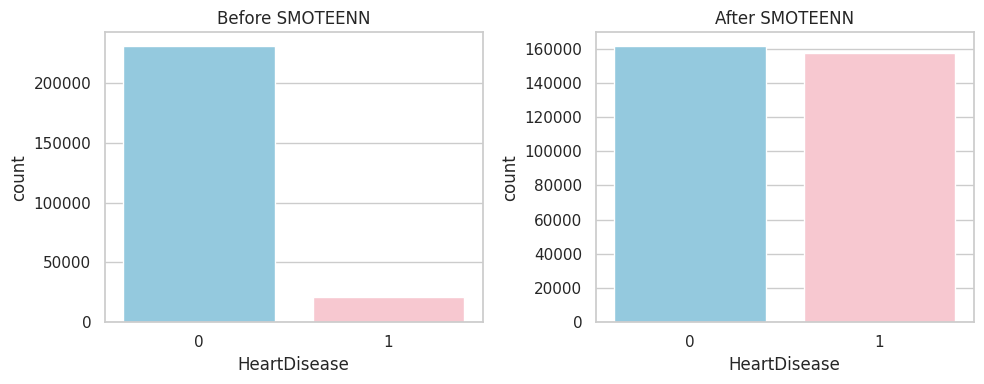

In [ ]:
# 원본 클래스 분포
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x=y_train, ax=ax[0], palette='blend:skyblue,pink')
ax[0].set_title('Before SMOTEENN')

# 리샘플된 클래스 분포
sns.countplot(x=y_resampled, ax=ax[1], palette='blend:skyblue,pink')
ax[1].set_title('After SMOTEENN')
plt.tight_layout()
plt.show()

# 5.5) 심장병 예측 모델 개발

In [ ]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.inspection import permutation_importance

## A) 로지스틱 회귀

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_resampled, y_resampled)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression 평가 지표")
print("Accuracy :", round(accuracy_score(y_test, y_pred_lr), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_lr), 4))
print("Recall   :", round(recall_score(y_test, y_pred_lr), 4))
print("Precision:", round(precision_score(y_test, y_pred_lr), 4))
print("F1-score :", round(f1_score(y_test, y_pred_lr), 4))

print("\nClassification Report")
print(classification_report(y_test, y_pred_lr))


Logistic Regression 평가 지표
Accuracy : 0.7317
AUC      : 0.7516
Recall   : 0.7756
Precision: 0.2079
F1-score : 0.3279

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.73      0.83     57731
           1       0.21      0.78      0.33      5320

    accuracy                           0.73     63051
   macro avg       0.59      0.75      0.58     63051
weighted avg       0.91      0.73      0.79     63051



## B) 랜덤포레스트

In [ ]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest 평가 지표")
print("Accuracy :", round(accuracy_score(y_test, y_pred_rf), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_rf), 4))
print("Recall   :", round(recall_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("F1-score :", round(f1_score(y_test, y_pred_rf), 4))
print("\nClassification Report")
print(classification_report(y_test, y_pred_rf))


Random Forest 평가 지표
Accuracy : 0.8005
AUC      : 0.7055
Recall   : 0.5914
Precision: 0.2321
F1-score : 0.3334

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     57731
           1       0.23      0.59      0.33      5320

    accuracy                           0.80     63051
   macro avg       0.59      0.71      0.61     63051
weighted avg       0.89      0.80      0.84     63051



## C) XGBoost

In [ ]:
scale_pos_weight = (y_resampled == 0).sum() / (y_resampled == 1).sum()

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                          random_state=42, scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBoost 평가 지표")
print("Accuracy :", round(accuracy_score(y_test, y_pred_xgb), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_xgb), 4))
print("Recall   :", round(recall_score(y_test, y_pred_xgb), 4))
print("Precision:", round(precision_score(y_test, y_pred_xgb), 4))
print("F1-score :", round(f1_score(y_test, y_pred_xgb), 4))
print("\nClassification Report")
print(classification_report(y_test, y_pred_xgb))


XGBoost 평가 지표
Accuracy : 0.7732
AUC      : 0.75
Recall   : 0.722
Precision: 0.2305
F1-score : 0.3495

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     57731
           1       0.23      0.72      0.35      5320

    accuracy                           0.77     63051
   macro avg       0.60      0.75      0.61     63051
weighted avg       0.91      0.77      0.82     63051



## D) LightGBM

In [ ]:
X_train_lgbm = pd.DataFrame(X_resampled, columns=X_test.columns)
X_test_lgbm = X_test.copy()
X_train_lgbm.columns = X_train_lgbm.columns.str.replace(r"[^\w]", "_", regex=True)
X_test_lgbm.columns = X_test_lgbm.columns.str.replace(r"[^\w]", "_", regex=True)

lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_train_lgbm, y_resampled)
y_pred_lgbm = lgbm_model.predict(X_test_lgbm)

print("\nLightGBM 평가 지표")
print("Accuracy :", round(accuracy_score(y_test, y_pred_lgbm), 4))
print("ROC AUC  :", round(roc_auc_score(y_test, y_pred_lgbm), 4))
print("Recall   :", round(recall_score(y_test, y_pred_lgbm), 4))
print("Precision:", round(precision_score(y_test, y_pred_lgbm), 4))
print("F1-score :", round(f1_score(y_test, y_pred_lgbm), 4))
print("\nClassification Report")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 157554, number of negative: 161506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 990
[LightGBM] [Info] Number of data points in the train set: 319060, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

LightGBM 평가 지표
Accuracy : 0.7785
AUC      : 0.7571
Recall   : 0.7314
Precision: 0.2368
F1-score : 0.3578

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.78      0.87     57731
           1       0.24      0.73      0.36      5320

    accuracy                           0.78     63051
   macro avg       0.60      0.76      0.61     63051
weighted avg       0.91      0.78      0.8

In [ ]:
# Permutation Importance 계산 (scoring 기준: f1)
result = permutation_importance(
    estimator=lgbm_model,
    X=X_test_lgbm,
    y=y_test,
    n_repeats=10,
    scoring='f1',
    random_state=42,
    n_jobs=1
)

perm_df = pd.DataFrame({
    "Feature": X_test_lgbm.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

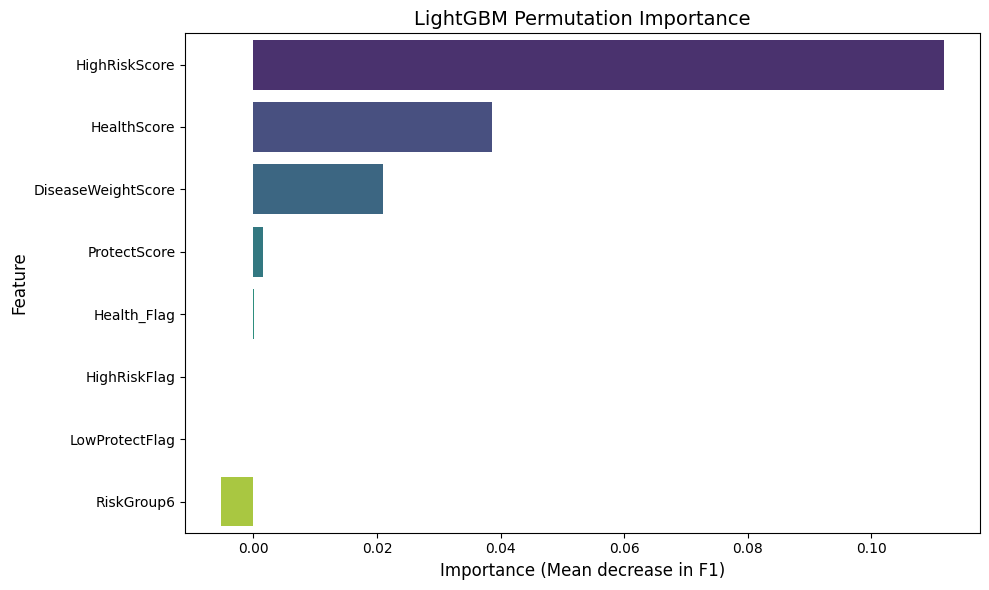

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=perm_df.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("LightGBM Permutation Importance", fontsize=14)
plt.xlabel("Importance (Mean decrease in F1)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

## E) Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import AUC
import tensorflow.keras.backend as K

In [ ]:
def f1_metric(y_true, y_pred):
    y_pred_binary = K.round(y_pred)
    y_true = K.cast(y_true, 'float32')
    tp = K.sum(K.cast(y_true * y_pred_binary, 'float32'), axis=0)
    fp = K.sum(K.cast((1 - y_true) * y_pred_binary, 'float32'), axis=0)
    fn = K.sum(K.cast(y_true * (1 - y_pred_binary), 'float32'), axis=0)

    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    f1 = 2 * precision * recall / (precision + recall + K.epsilon())
    return K.mean(f1)

X_train_nn = X_resampled.values
X_test_nn = X_test.values
y_train_nn = y_resampled.values
y_test_nn = y_test.values

In [ ]:
model = Sequential([
    Dense(64, input_shape=(X_train_nn.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', AUC(name='auc'), f1_metric]
)

early_stop = EarlyStopping(monitor='val_f1_metric', mode='max', patience=5, restore_best_weights=True)


In [ ]:
history = model.fit(
    X_train_nn, y_train_nn,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    callbacks=[early_stop],
    verbose=2
)

y_pred_prob = model.predict(X_test_nn)
y_pred_nn = (y_pred_prob > 0.5).astype(int)

print("\nNeural Network 평가 지표")
print("Accuracy :", round(accuracy_score(y_test_nn, y_pred_nn), 4))
print("ROC AUC  :", round(roc_auc_score(y_test_nn, y_pred_prob), 4))
print("Recall   :", round(recall_score(y_test_nn, y_pred_nn), 4))
print("Precision:", round(precision_score(y_test_nn, y_pred_nn), 4))
print("F1-score :", round(f1_score(y_test_nn, y_pred_nn), 4))
print("\nClassification Report")
print(classification_report(y_test_nn, y_pred_nn))

Epoch 1/50
998/998 - 10s - 10ms/step - accuracy: 0.8444 - auc: 0.9167 - f1_metric: 0.2014 - loss: 0.3559 - val_accuracy: 0.8209 - val_auc: 0.0000e+00 - val_f1_metric: 0.9013 - val_loss: 0.4282
Epoch 2/50
998/998 - 11s - 11ms/step - accuracy: 0.8561 - auc: 0.9285 - f1_metric: 0.1986 - loss: 0.3271 - val_accuracy: 0.8027 - val_auc: 0.0000e+00 - val_f1_metric: 0.8903 - val_loss: 0.4626
Epoch 3/50
998/998 - 8s - 8ms/step - accuracy: 0.8582 - auc: 0.9303 - f1_metric: 0.1989 - loss: 0.3231 - val_accuracy: 0.8102 - val_auc: 0.0000e+00 - val_f1_metric: 0.8949 - val_loss: 0.4463
Epoch 4/50
998/998 - 7s - 7ms/step - accuracy: 0.8592 - auc: 0.9313 - f1_metric: 0.1986 - loss: 0.3208 - val_accuracy: 0.8348 - val_auc: 0.0000e+00 - val_f1_metric: 0.9098 - val_loss: 0.4124
Epoch 5/50
998/998 - 9s - 9ms/step - accuracy: 0.8594 - auc: 0.9318 - f1_metric: 0.1990 - loss: 0.3198 - val_accuracy: 0.8113 - val_auc: 0.0000e+00 - val_f1_metric: 0.8955 - val_loss: 0.4446
Epoch 6/50
998/998 - 6s - 6ms/step - accu

# 6.1) 결과 해석

## A) 로지스틱 회귀 해석

In [ ]:
X_train_const = sm.add_constant(X_resampled)
logit_model = sm.Logit(y_resampled, X_train_const)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.343891
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:               319060
Model:                          Logit   Df Residuals:                   319051
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Apr 2025   Pseudo R-squ.:                  0.5038
Time:                        11:19:32   Log-Likelihood:            -1.0972e+05
converged:                       True   LL-Null:                   -2.2113e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2425      0.024    -51.652      0.000      -1.290      -1.195
HighR

In [ ]:
coefs = result.params
pvals = result.pvalues
odds_ratios = np.exp(coefs)

coef_df = pd.DataFrame({
    'Feature': coefs.index,
    'Coefficient': coefs.values,
    'P-value': pvals.values,
    'Odds Ratio (e^β)': odds_ratios.values
})

sig_df = coef_df[coef_df['P-value'] < 0.05].copy()
sig_df = sig_df.sort_values(by='Coefficient', ascending=False)

In [ ]:
sig_df

,Feature,Coefficient,P-value,Odds Ratio (e^β)
1,HighRiskScore,1.271792,0.000000e+00,3.567241
7,DiseaseWeightScore,0.608946,0.000000e+00,1.838493
6,HighRiskFlag,0.402522,2.738576e-68,1.495591
4,LowProtectFlag,0.064619,1.988252e-03,1.066752
8,RiskGroup6,-0.049180,1.275241e-04,0.952010
3,ProtectScore,-0.102910,5.194495e-28,0.902208
5,HealthScore,-1.107735,0.000000e+00,0.330306
0,const,-1.242496,0.000000e+00,0.288663


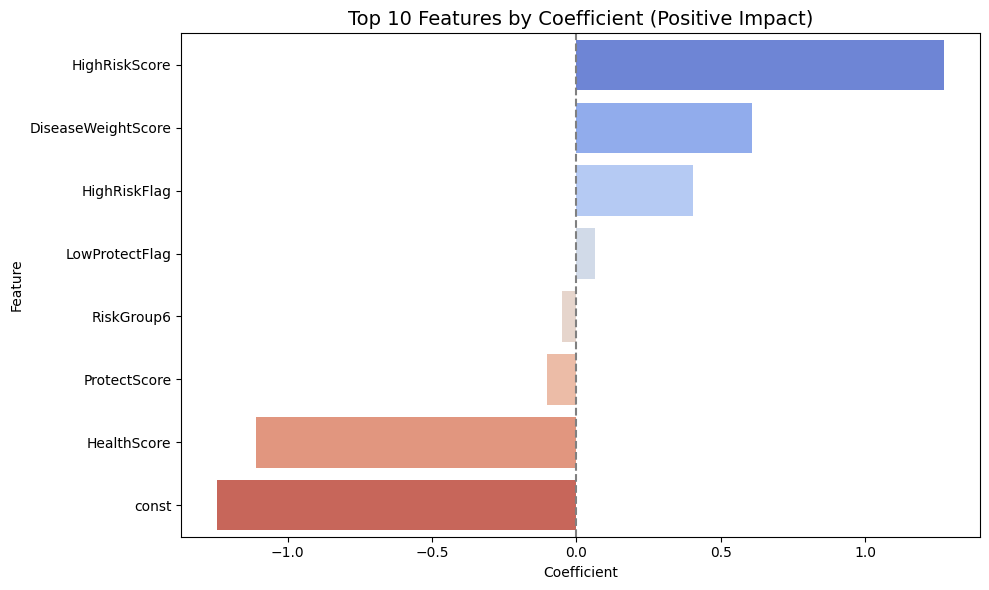

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sig_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Top 10 Features by Coefficient (Positive Impact)", fontsize=14)
plt.tight_layout()
plt.show()

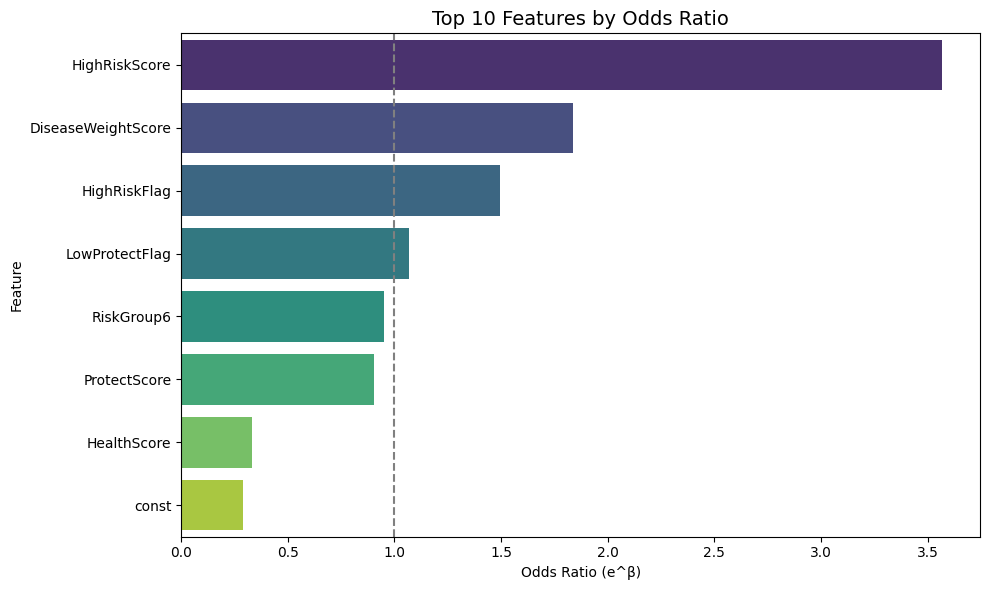

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sig_df.head(10), x='Odds Ratio (e^β)', y='Feature', palette='viridis')
plt.axvline(1, color='gray', linestyle='--')
plt.title("Top 10 Features by Odds Ratio", fontsize=14)
plt.tight_layout()
plt.show()

## B) FinalRiskScore_Logit
최종 로지스틱 기반 위험 점수 수식


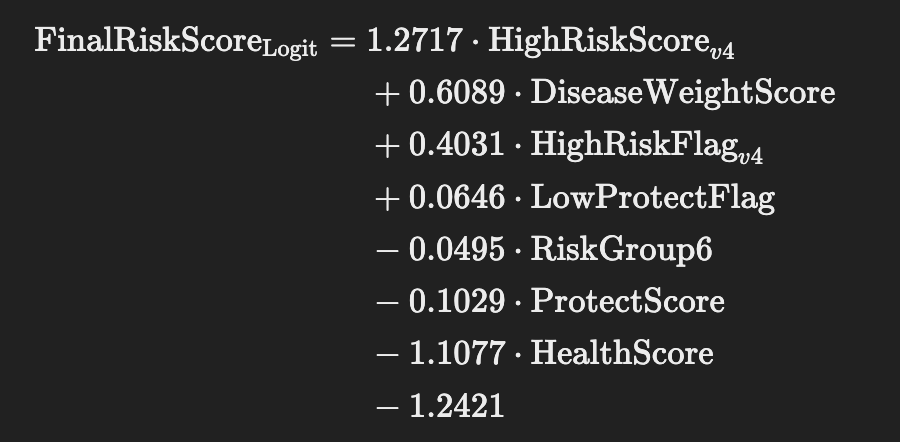

In [ ]:
df1['FinalRiskScore_Logit'] = (
    1.2717 * df['HighRiskScore'] +
    0.6089 * df['DiseaseWeightScore'] +
    0.4031 * df['HighRiskFlag'] +
    0.0646 * df['LowProtectFlag'] +
   -0.0495 * df['RiskGroup6'] +
   -0.1029 * df['ProtectScore'] +
   -1.1077 * df['HealthScore'] +
    -1.2421
)

## C) FinalRiskFlag

In [ ]:
# 실제 정답
y_true = df1['HeartDisease']
# 점수
score = df1['FinalRiskScore_Logit']

# ROC Curve 기반 최적 Threshold 계산 (Youden's J)
fpr, tpr, thresholds = roc_curve(y_true, score)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"최적 Threshold: {optimal_threshold:.4f}")

# Flag 생성
df1['FinalRiskFlag'] = (df1['FinalRiskScore_Logit'] >= optimal_threshold).astype(int)


최적 Threshold: -5.5331


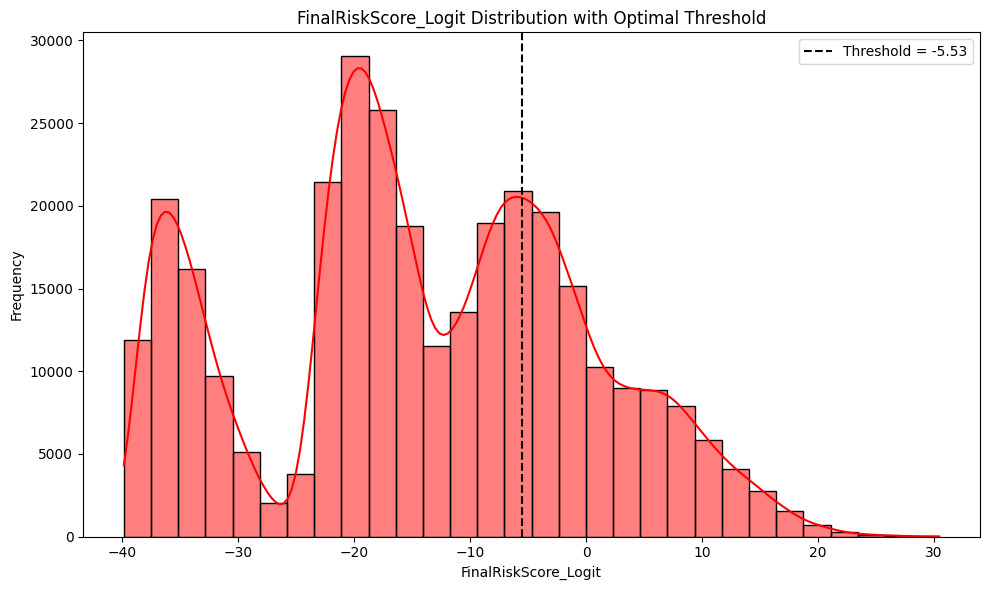

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(score, kde=True, bins=30, color='Red')
plt.axvline(optimal_threshold, color='black', linestyle='--', label=f'Threshold = {optimal_threshold:.2f}')
plt.title("FinalRiskScore_Logit Distribution with Optimal Threshold")
plt.xlabel("FinalRiskScore_Logit")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 평가
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, df1['FinalRiskFlag']))

print("\nClassification Report:")
print(classification_report(y_true, df1['FinalRiskFlag'], digits=4))

print(f"ROC AUC Score: {roc_auc_score(y_true, score):.4f}")


Confusion Matrix:
[[213369  75282]
 [  8354  18247]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9623    0.7392    0.8361    288651
           1     0.1951    0.6860    0.3038     26601

    accuracy                         0.7347    315252
   macro avg     0.5787    0.7126    0.5700    315252
weighted avg     0.8976    0.7347    0.7912    315252

ROC AUC Score: 0.7743


**간단하게는 이 flag보고 결정할수도 있고(정확도 69%), 좀 더 정확히 볼려면 시그모이드 함수 통과시키면 78% 정확도를 보인다**